**Part 1: https://www.youtube.com/watch?app=desktop&v=tODN7x3BO_E&t=0s**

**Part 2: https://www.youtube.com/watch?v=NPdn3YPkg9w**

**Part 3: https://www.youtube.com/watch?v=0HDy6n3UD5M**


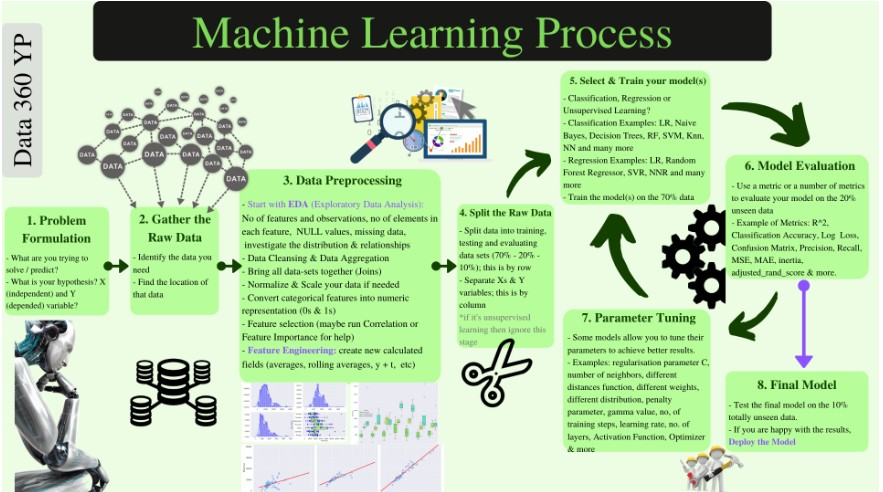

In [1]:
#Machine Learning process

import os
from IPython.display import Image
PATH = "C:\\Users\\omodu\\OneDrive\\Documents\\Learning coding and python\\My Work_ipynb\\UEL-DS\\Logistic regression\\"
Image(filename = PATH + "ML_pic.jpg", width = 900, height = 900)

###     Problem Formulation     ###

- *We want to investigate the factors that affect a goor or bad loan*

- *Make predictions whether a customer should get their loan approved or not based on their characteristics*

- *Hence our dependent variable (y) is the loan approval (Yes/No) or if the loan is good or bad*

In [2]:
#packages and libraries

import os #provides funcs for interatcing with the operating sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt



In [3]:
%matplotlib inline

# To change specific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

#Increase size of sns plots
sns.set_theme(rc= {'figure.figsize':(12,10)})

#!conda list   # ---> to check the packages installed


In [4]:
#### LOADING THE DATA

raw_data = pd.read_csv("C:\\Users\\omodu\\OneDrive\\Documents\\Learning coding and python\\My Work_ipynb\\UEL-DS\\Logistic regression\\Logistic Regression Dummy Data for reg_2.csv")

#Print shape

print(raw_data.shape)


#run first 5 rows
raw_data.head(5)

(1006, 14)


,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [5]:
##### DATA PREPROCESSING

# checking for null values
raw_data.isnull()      #in the outsput: 'FALSE' means value is NOT null

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1002,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1003,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1004,True,True,True,True,True,True,True,True,True,False,False,False,False,True


In [6]:
# we can summarise the null values per feature/column
raw_data.isnull().sum()

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Stauts        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [7]:
# Its good practice to visualise your null values to see if we can fix them

#lets try with an arbitrarily selected column
raw_data[raw_data['Employment History'].isnull()]

# we can see the 5v observations with a null under the "Employment History" column
# in this situation we couldn't really make a guesstimate on employment history's missing values, so we will need to remove the nulls
# HOWEVER, **RECALL** our "handling missing values" R tutorial --> just like that situation, age for example with minimal missing values...
#... coudld have missing values replaced by the mean, median, etc. (That would be an acceptable guess)

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# so we need to delete Nulls

# raw_data.dropna()  # removes ALL NAs from the data. We don't necessarily want this

# let's be surgical with employment history

raw_data = raw_data.dropna(subset = ['Employment History'])

#printing the shape
print(raw_data.shape)  # output shows, no missing observations. so dropping the NAs in employment solved our issues

# Visualise the NULL observations
raw_data.isnull().sum()


(1001, 14)


Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Stauts        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

In [9]:
# Investigate all the elemets within the feature

for column in raw_data:
    unique_values = np.unique(raw_data[column])
    nr_values = len(unique_values)
    if nr_values < 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))
        
  # in If statement: output shows the column repping 1st curly bracket, number of unique values in 2nd curly, and then the description of the unique values come as a list due to repping the 3rd curly bracket 

The number of values for feature Type of Account is: 4 -- ['No Data' 'Type A' 'Type B' 'Type C']
The number of values for feature Account History is: 3 -- ['Average (known delays)' 'Good' 'critical']
The number of values for feature Reason for the Loan is: 10
The number of values for feature Loan Amount is: 911
The number of values for feature Account Savings is: 5 -- ['0-200' '1000+' '200-500' '500-1000' 'No Data']
The number of values for feature Employment History is: 5 -- ['0-2 Years' '2-5 Years' '5-7 Years' '7+ Years' 'Unemployed']
The number of values for feature Individual Stauts is: 5 -- ['Divorced' 'Female' 'Female_' 'Male' 'Married']
The number of values for feature Other Loans is: 2 -- ['No' 'Yes']
The number of values for feature Security / Collateral is: 4 -- ['No Security' 'Property - Real Estate' 'Savings Account' 'Vehicle']
The number of values for feature Age is: 57
The number of values for feature Residence Status is: 3 -- ['Free' 'House Owner' 'Renting']
The number o

In [10]:
# Visualise the data using seaborn pairplots

#g = sns.pairplot(raw_data)  #takes forever to run; despite the fact that sns.pairplot will only work on numerical values therefore will choose only loan amt and age

# frac = 0.20

#df = pd.DataFrame(np.random(n_x, 100),
                 #columns = ["Loan Amount", "Age"])
# plt.figure(figsize=(20,15))
# sns.pairplot(raw_data.sample(frac=frac))
# plt.show()


#NOTES: DO NOT run this on a big dataset ---> FIlter the columns first

#output is not good. could not recreate tutorial

In [11]:
# Deleting the outlier1

#Output from tutorial showed ages up to 300, so we delete the erroneous figures

raw_data[raw_data['Age']>100]  #as a check: we see an outlier with age = 327, and a loan amount that is negative

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
679,Type C,Good,Home furniture,-548541254.0,No Data,Unemployed,Female_,No,Vehicle,327.0,House Owner,Skilled Labor,Yes,Yes


In [12]:
# Deleting the outlier2

raw_data = raw_data[raw_data['Age']<100]

raw_data.shape    #we see we now have 1000 rows

(1000, 14)

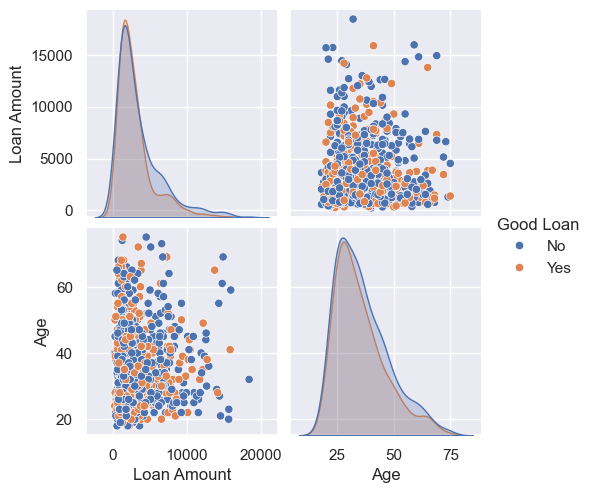

In [13]:
g = sns.pairplot(raw_data, hue = 'Good Loan')   #AAAHHHH so it was the outlier that caused us so much grief

plt.show()

#Output shows that when we have a higher loan amount (>15000), we have more Nos (blue dots) than Yes

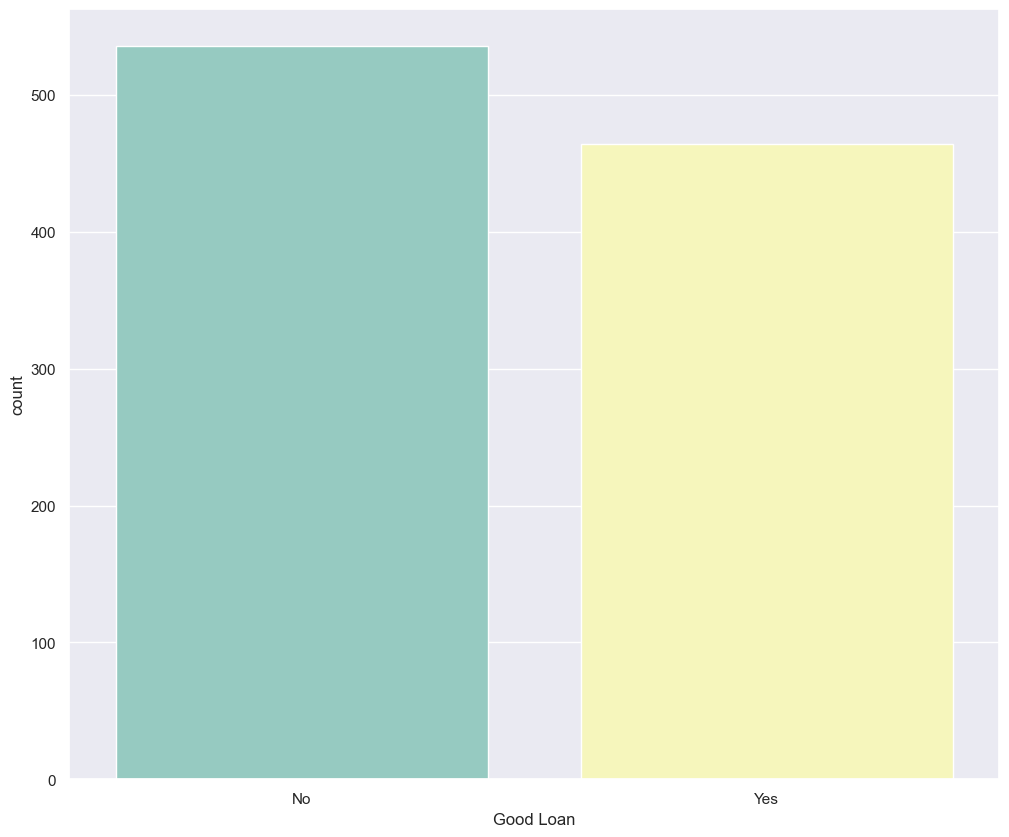

In [14]:
###### START of VID 2 (Part 2)

# investigating the distribution of y

ax = sns.countplot(x="Good Loan", data=raw_data, hue = 'Good Loan', palette= "Set3")
plt.show()

In [15]:
raw_data.columns

Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

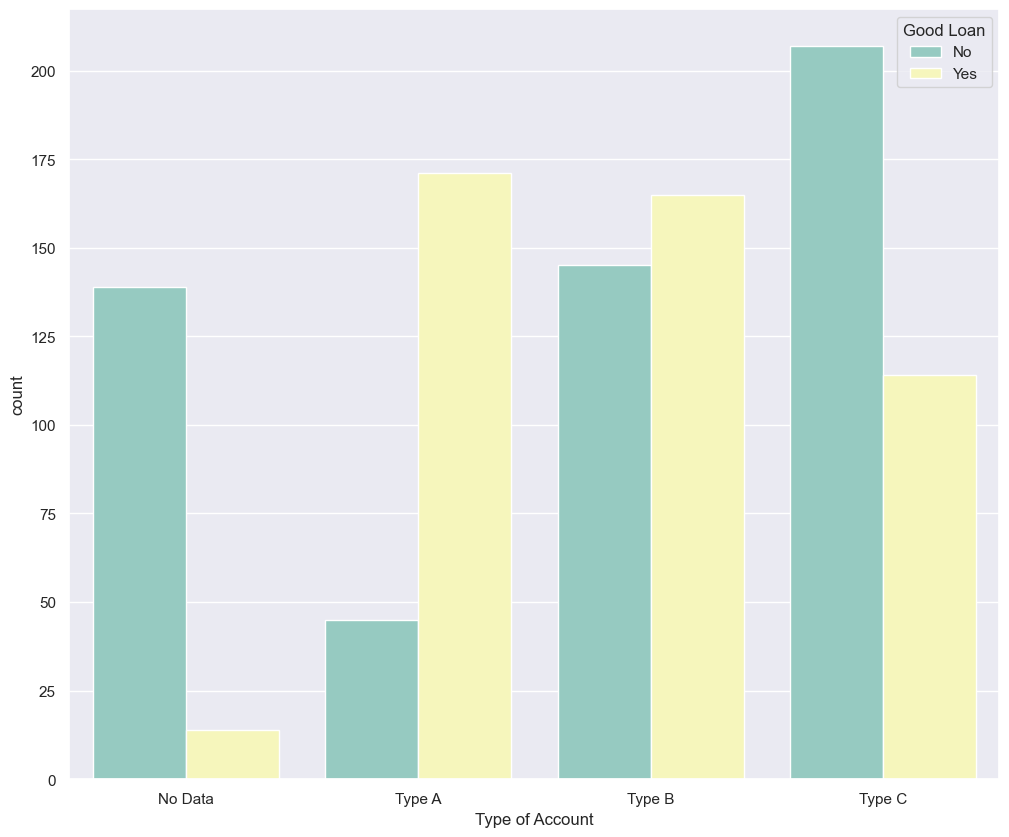

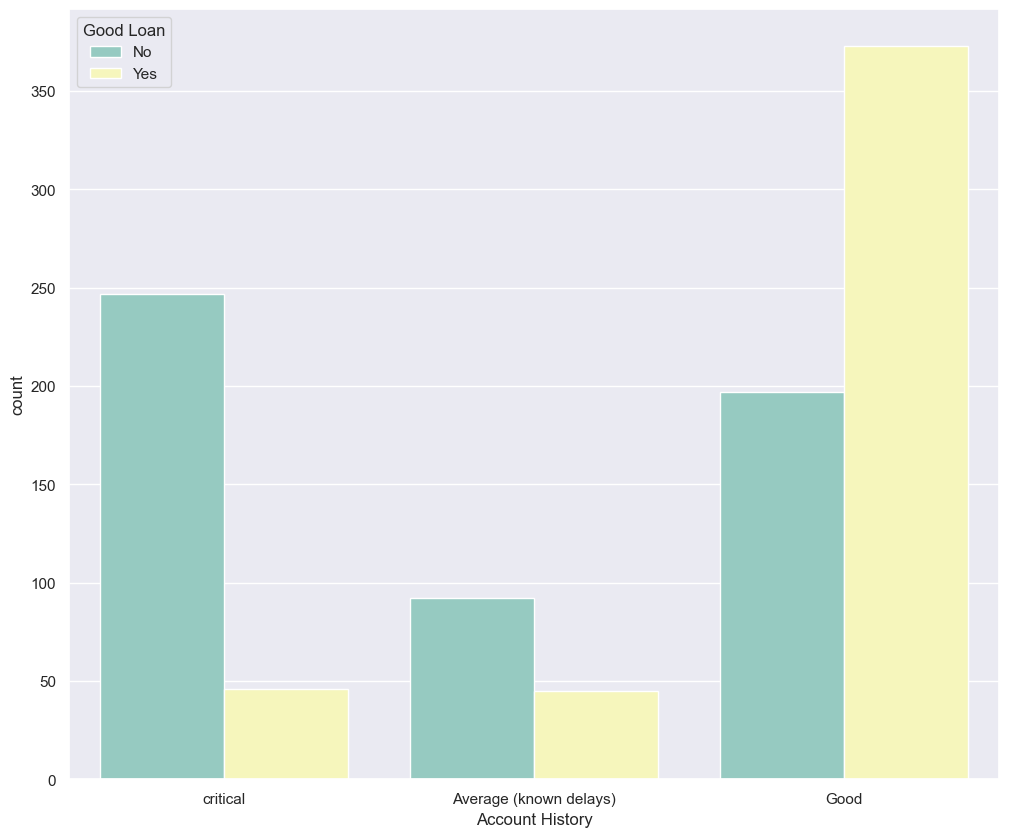

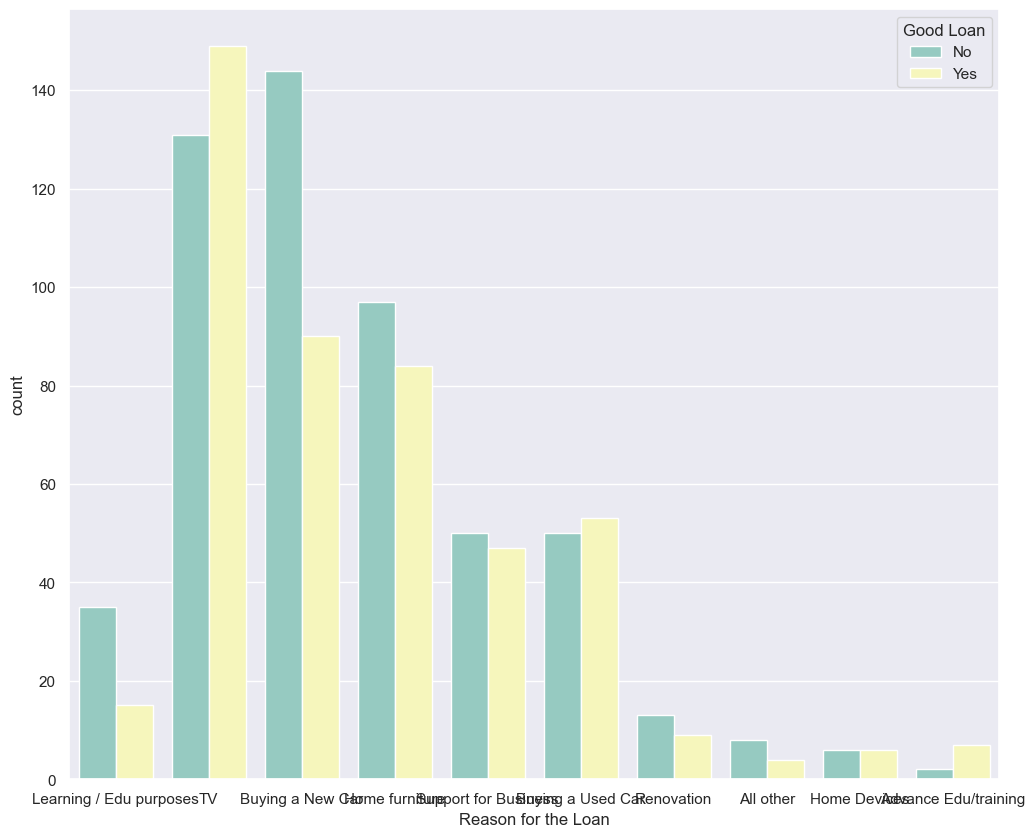

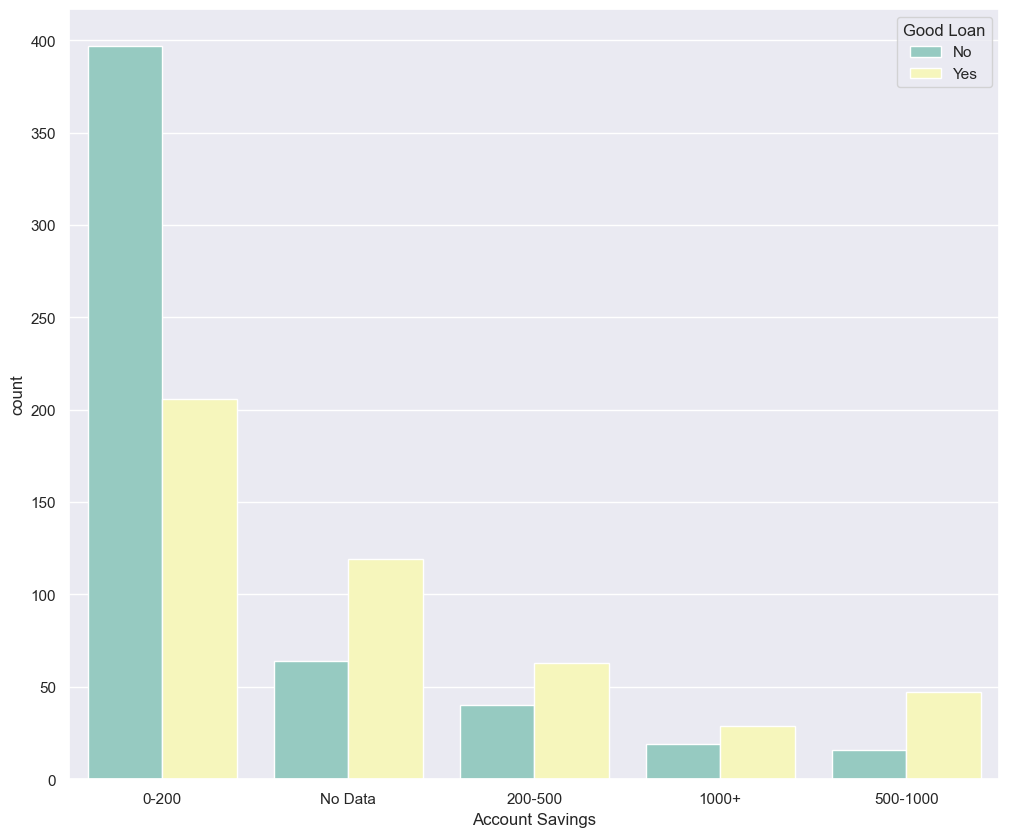

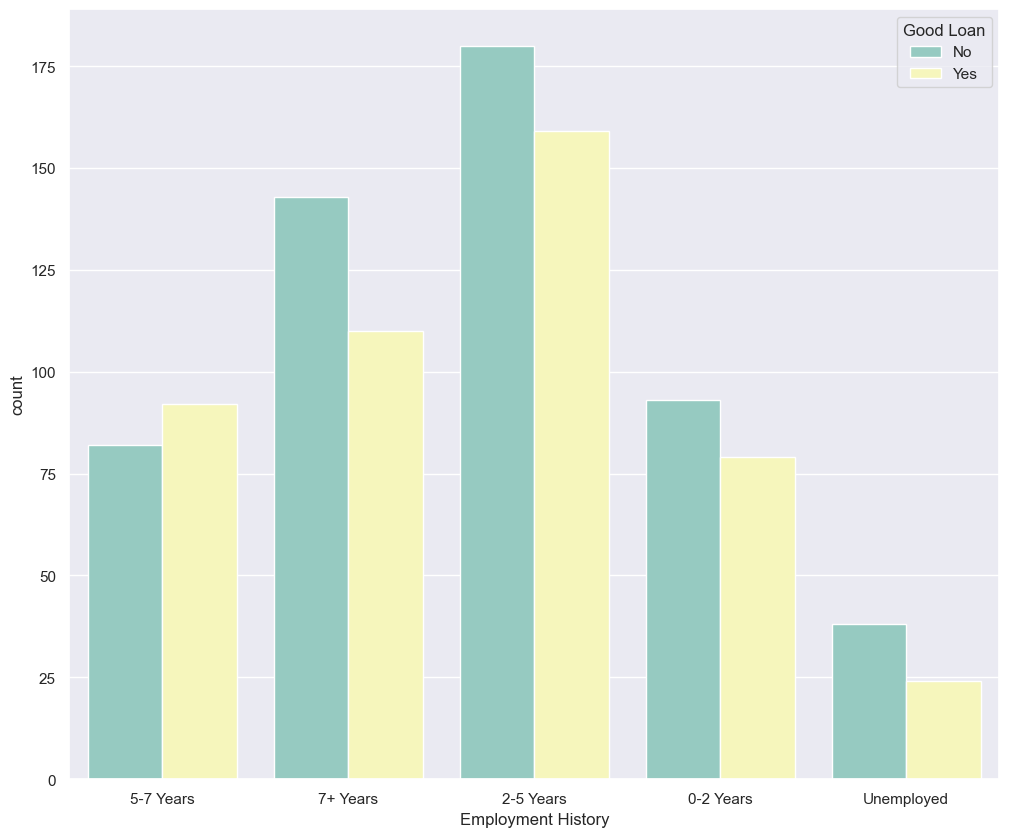

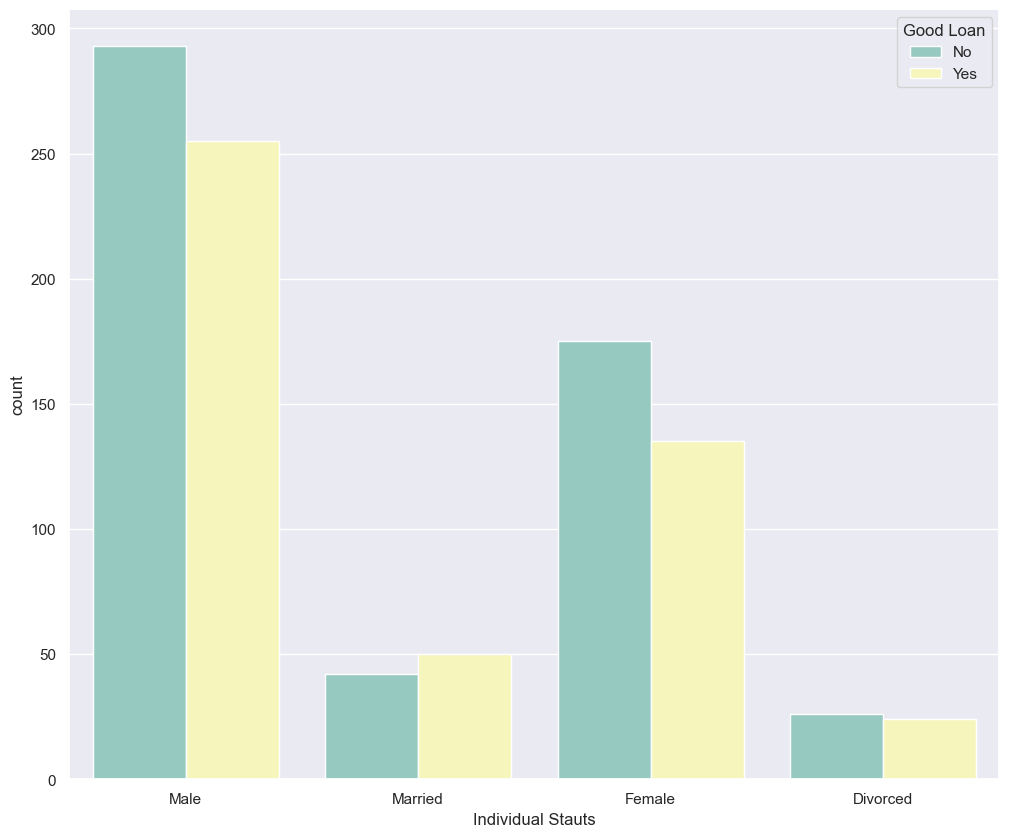

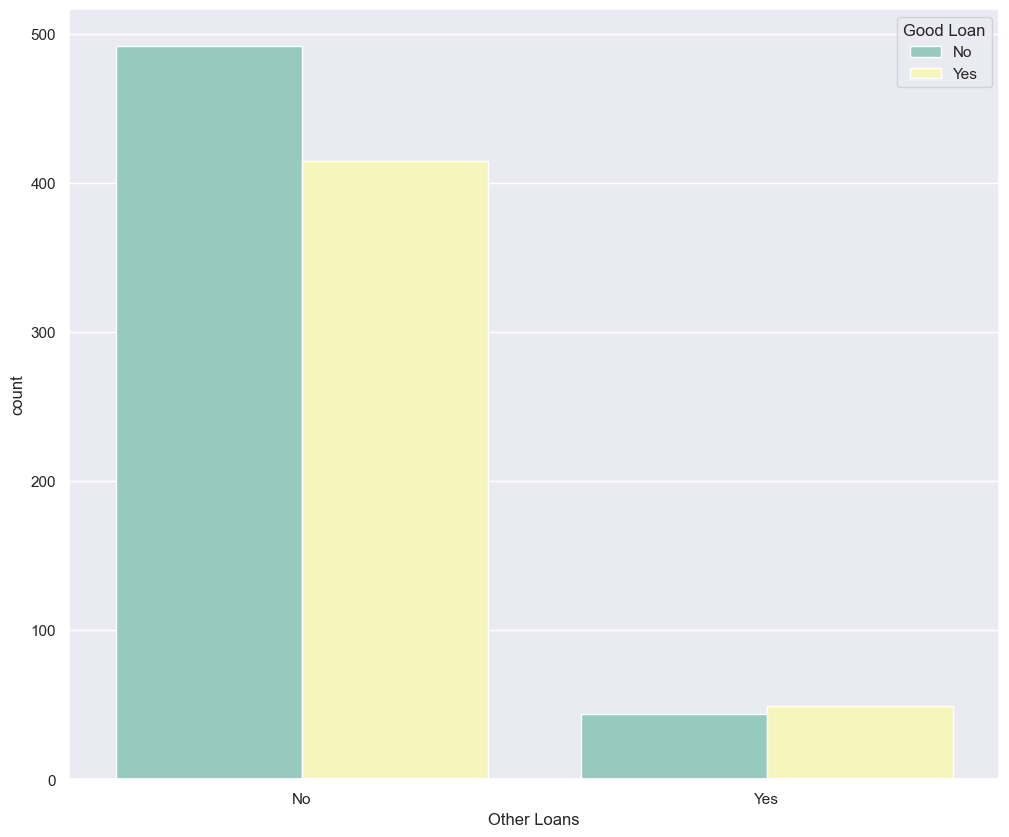

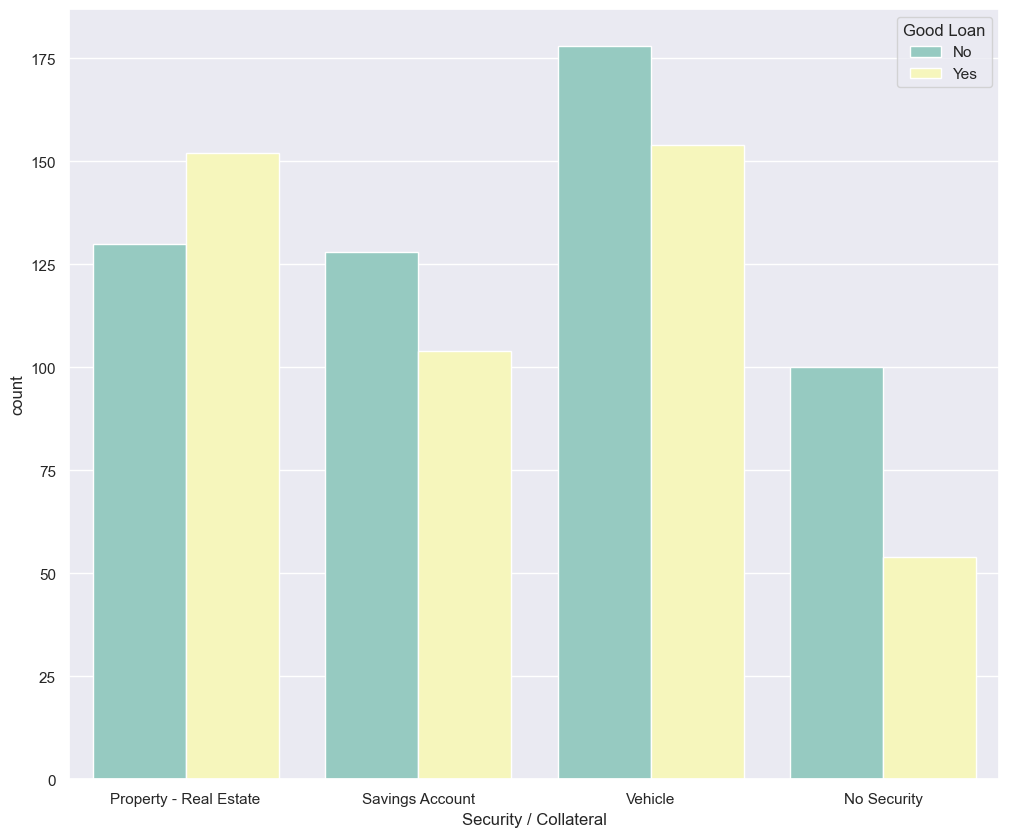

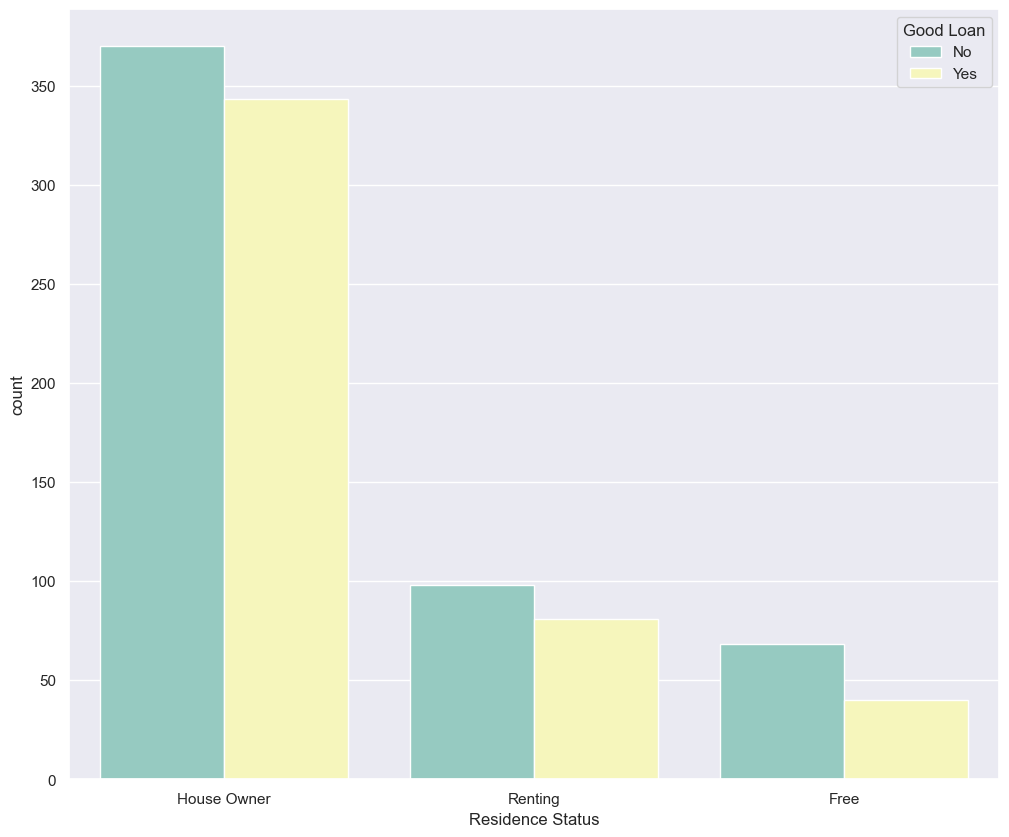

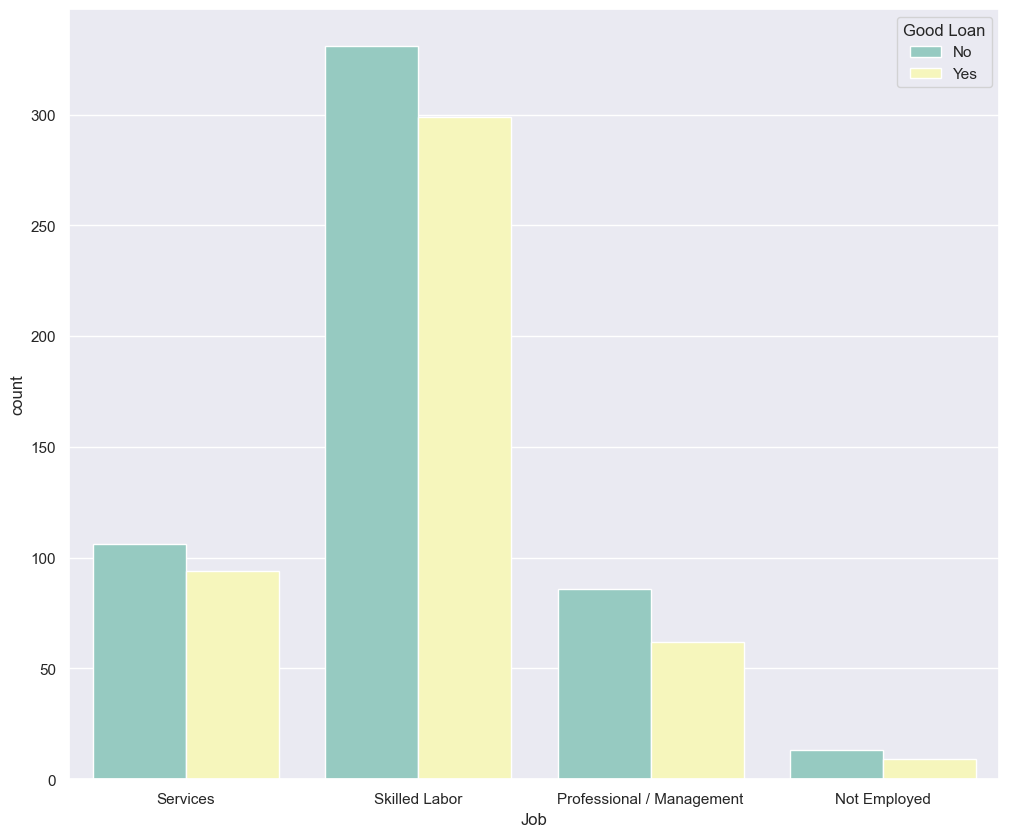

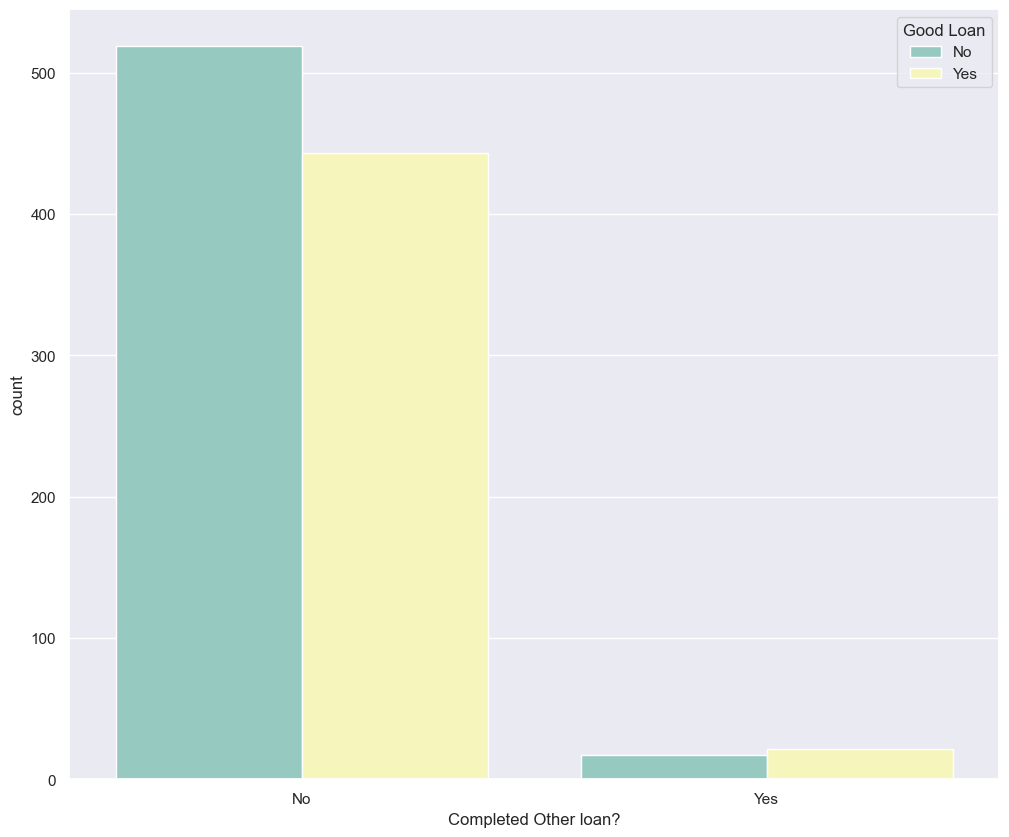

In [16]:
# Looping through all features by our y variable - to see if there is a rel.

features = ['Type of Account', 'Account History', 
            'Reason for the Loan', 'Account Savings', 
            'Employment History', 'Individual Stauts', 
            'Other Loans', 'Security / Collateral', 
            'Residence Status', 'Job', 'Completed Other loan?']           #removed the numerical columns (loan amt and age, because with them in, output would be too messy), and "Good loan" (bcos we would be referring to an x axis by its legend => redundant - u can add it and see)

for f in features:
    sns.countplot(x= f, data = raw_data, palette= 'Set3', hue= 'Good Loan')
    plt.show()

In [17]:
raw_data.head()

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [18]:
# Making categorical varibles into numeric representation (like levels in R) 1

pd.get_dummies(raw_data, columns = features, dtype=float)  #need to specify dtype to get 1s and 0s, otherwise, default is string = true/false

,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,No,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2438.0,52.0,No,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2144.0,48.0,No,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2073.0,25.0,No,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1276.0,59.0,No,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3602.0,47.0,No,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1000,4473.0,35.0,No,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1001,12759.0,38.0,Yes,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1002,2551.0,47.0,No,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [19]:
# Making categorical varibles into numeric representation (like levels in R) 2

new_raw_data = pd.get_dummies(raw_data, columns = features, dtype=float)  #need to specify dtype to get 1s and 0s, otherwise, default is string = true/false

print(new_raw_data.shape)

#Creating a new numerical y variable (good loan)

new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'Yes'] = 1     #Chained assignment: i.e. df["col"][row_indexer] = value
new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'No'] = 0
# Notes:
# We can also do this with label encoding (like in logistic reg_1 script) and oneHotencoder from preprocessing library

new_raw_data


(1000, 49)


C:\Users\omodu\AppData\Local\Temp\ipykernel_14060\3932348054.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'Yes'] = 1     #Chained assignment: i.e. df["col"][row_indexer] = value
C

,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2438.0,52.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2144.0,48.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2073.0,25.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1276.0,59.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3602.0,47.0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1000,4473.0,35.0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1001,12759.0,38.0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1002,2551.0,47.0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [20]:
##### SPLITTING DATA

# Although we don't have many features in this example, in application we may have a huge dataset
# As such, we may not be able to use all of the data. To save computational time, we need to split the data into X and y
# For this we could use Tree-based estimators, and then run feature importance


# splitting the data
X = new_raw_data.drop('Good Loan', axis=1).values     # .drop('Good Loan', axis=1): This part uses the .drop() method to remove a column from the DataFrame. 
                                                      # 'axis =1' in this sense (i.e. in a dataframe) : indicates we are dropping a column. 'axis = 0' would drop a row
                                                      # '.values': This attribute returns a NumPy array representation of the DataFrame's data.  
                                                      # The '.values' attribute is essential because many machine learning algorithms (especially those in scikit-learn) work best with NumPy arrays as input, not Pandas DataFrames.

y = new_raw_data['Good Loan']

y = y.astype(int)  #setting y as an integer

print(X.shape)
print (y.shape)


(1000, 48)
(1000,)


In [21]:
# Run a tree-based estimator

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth=10)
dt.fit(X,y)

#Output shows it is fitted

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [22]:
# Running Feature importance 1

for i,column in enumerate(new_raw_data.drop('Good Loan', axis = 1)):
    print('The feature importance for {} is: {}'.format(column, dt.feature_importances_[i]))

#output: it's not immediately clear in this output to select the features with the most importance. See next cell for soln

The feature importance for Loan Amount is: 0.12122079844891431
The feature importance for Age is: 0.07962988068108864
The feature importance for Type of Account_No Data is: 0.054236275712355064
The feature importance for Type of Account_Type A is: 0.04973253970745607
The feature importance for Type of Account_Type B is: 0.0
The feature importance for Type of Account_Type C is: 0.026698167265803152
The feature importance for Account History_Average (known delays) is: 0.0026219295620499047
The feature importance for Account History_Good is: 0.19131616315491018
The feature importance for Account History_critical is: 0.0
The feature importance for Reason for the Loan_Advance Edu/training is: 0.0
The feature importance for Reason for the Loan_All other is: 0.0
The feature importance for Reason for the Loan_Buying a New Car is: 0.012188194319512301
The feature importance for Reason for the Loan_Buying a Used Car is: 0.00657340597791024
The feature importance for Reason for the Loan_Home Devi

In [23]:
# Running Feature importance 2

fi_col = []
fi = []

for i,column in enumerate(new_raw_data.drop('Good Loan', axis = 1)):
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

# create a new dataframe for feature importance
fi_df = zip(fi_col, fi)                      # The zip() function in Python is used to combine multiple iterables (like lists, tuples, etc.) into a single iterator of tuples.
fi_df = pd.DataFrame(fi_df, columns=['Feature', 'Feature Importance'])

fi_df 

,Feature,Feature Importance
0,Loan Amount,0.121221
1,Age,0.079630
2,Type of Account_No Data,0.054236
3,Type of Account_Type A,0.049733
4,Type of Account_Type B,0.000000
5,Type of Account_Type C,0.026698
6,Account History_Average (known delays),0.002622
7,Account History_Good,0.191316
8,Account History_critical,0.000000
9,Reason for the Loan_Advance Edu/training,0.000000


In [24]:
# Ordering the data

fi_df.sort_values('Feature Importance', ascending = False).reset_index()   # reset index because when i ran without the command initially, the index was same as original, unsorted dataframe (see above)


#output shows me that if we used a principal component analysis, we would arrive at the same outcome

,index,Feature,Feature Importance
0,19,Account Savings_0-200,0.197515
1,7,Account History_Good,0.191316
2,0,Loan Amount,0.121221
3,1,Age,0.079630
4,2,Type of Account_No Data,0.054236
5,3,Type of Account_Type A,0.049733
6,5,Type of Account_Type C,0.026698
7,45,Job_Skilled Labor,0.020597
8,34,Other Loans_Yes,0.017520
9,23,Account Savings_No Data,0.016471


In [25]:
# creating columns to keep

# we can see that columns from indez 40 to 47, above, have an importance of 0 to the outcome: Good or bad loan

columns_to_keep = fi_df['Feature'][0:40]

columns_to_keep

0                                      Loan Amount
1                                              Age
2                          Type of Account_No Data
3                           Type of Account_Type A
4                           Type of Account_Type B
5                           Type of Account_Type C
6           Account History_Average (known delays)
7                             Account History_Good
8                         Account History_critical
9         Reason for the Loan_Advance Edu/training
10                   Reason for the Loan_All other
11            Reason for the Loan_Buying a New Car
12           Reason for the Loan_Buying a Used Car
13                Reason for the Loan_Home Devices
14              Reason for the Loan_Home furniture
15     Reason for the Loan_Learning / Edu purposes
16                  Reason for the Loan_Renovation
17        Reason for the Loan_Support for Business
18                          Reason for the Loan_TV
19                           Ac

<span style="color:red">
                                READ THIS FIRST BEFORE CONTINUING TO TUTORIAL!!!
</span>

- Please note that we have not normalised/Scaled our data
- Please note that we have not donw any feature engineering (i.e. creating new features)
- Please note that we have not joined multiple datasets together
- Please note that we have not aggregated any of our data 


In [26]:
# We don't need to normalise in a std. logistic reg. such as this


#### Now, we need to split the Raw data using Hold-out validation, but first lets look at the shape of our datasets

print (new_raw_data.shape) 
print(columns_to_keep.shape)

(1000, 49)
(40,)


In [27]:
#### split the Raw data using Hold-out validation

X = new_raw_data[columns_to_keep].values      #.values to tranform the data frame to numpy arrays for the ML process

y = new_raw_data['Good Loan']

y = y.astype(int)

print(X.shape)
print(y.shape)


(1000, 40)
(1000,)


In [28]:
# Hold-out validation

# we eventually want to test our model's performance on unseen data

# so:

# First validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, test_size = 0.2, random_state =15 )     # random_state: Controls the shuffling applied to the data before applying the split. Pass an int for reproducible (meaning every consequent time we run, we want the same or similar output) output across multiple function calls.

# Second validation (so we are passing the output (X and y_train) from above into a second run )
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size= 0.9, test_size = 0.1, random_state =15 )

print("X output:")
print("Training: ", X_train.shape)
print("Testing: ", X_test.shape)
print("Validation: ", X_valid.shape)
print('\n')
print("y output: ")
print("Training: ", y_train.shape)
print("Testing: ", y_test.shape)
print("Validation: ", y_valid.shape)


#output: recall we had 1000 rows. output sees our assigned splits (0.8 and 0.1)

X output:
Training:  (720, 40)
Testing:  (200, 40)
Validation:  (80, 40)


y output: 
Training:  (720,)
Testing:  (200,)
Validation:  (80,)


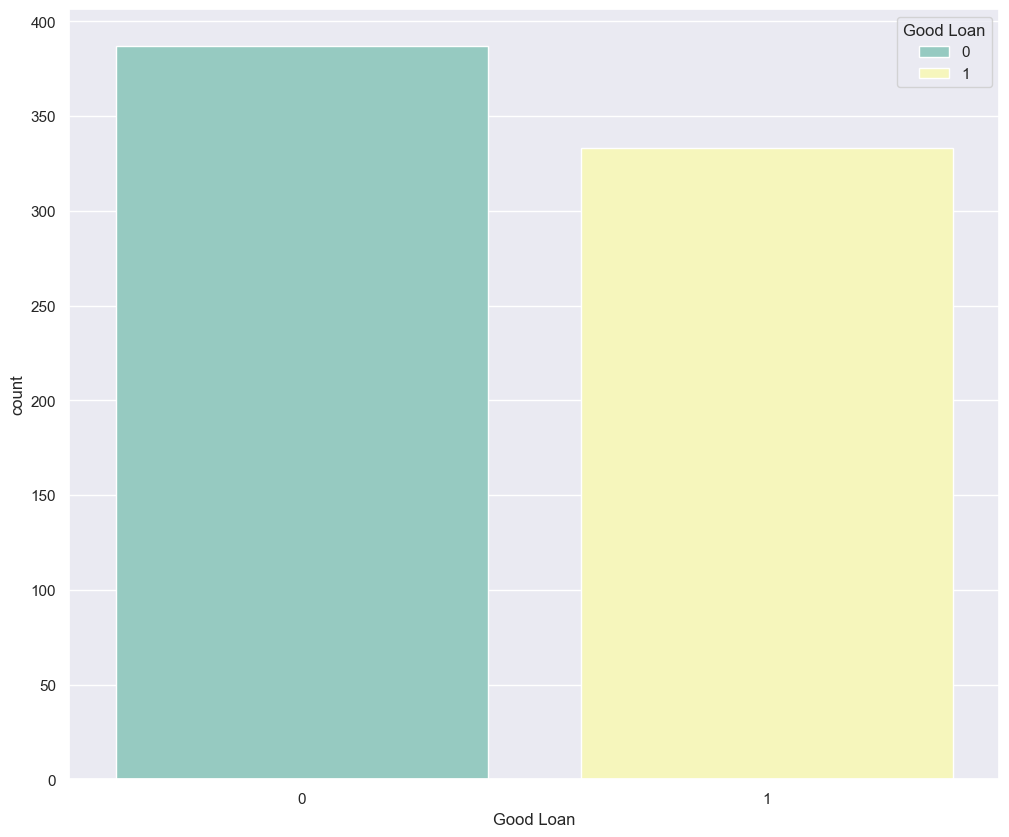

In [29]:
# Investigating the distr. of all y's 1

# Just to make sure we have balanced datasets

ax = sns.countplot(x = y_train, hue= y_train, palette="Set3")
plt.show()

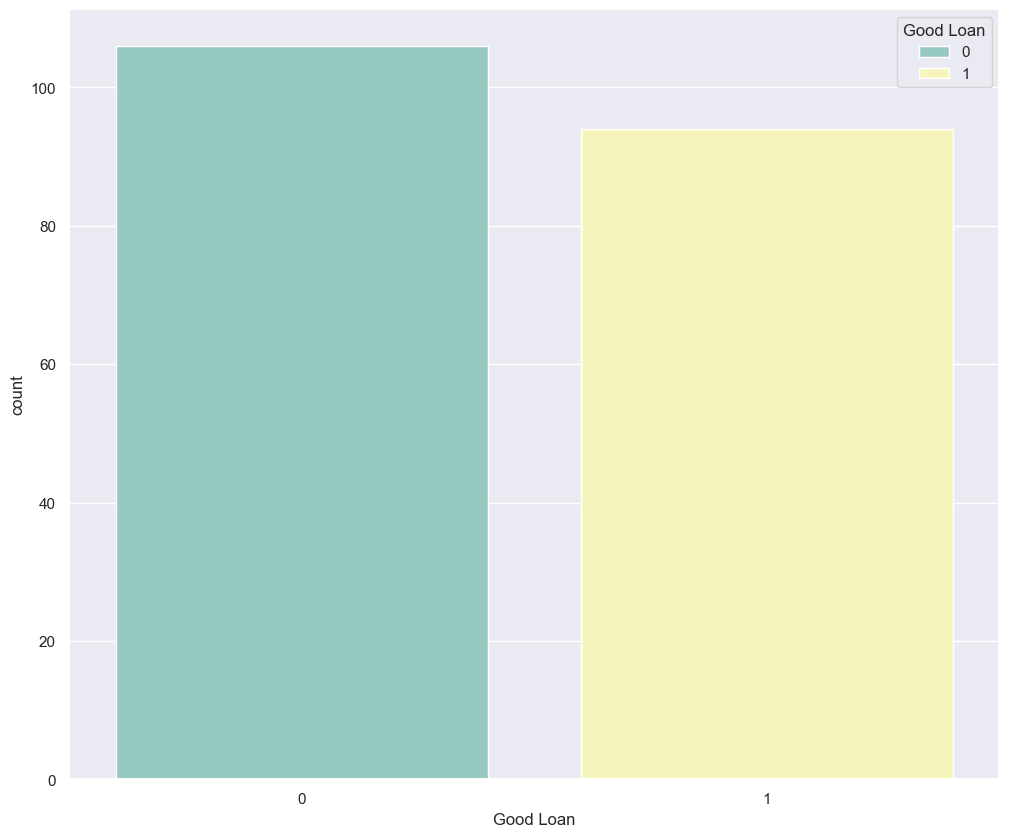

In [30]:
# Investigating the distr. of all y's 2


ax = sns.countplot(x = y_test, hue= y_test, palette="Set3")
plt.show()

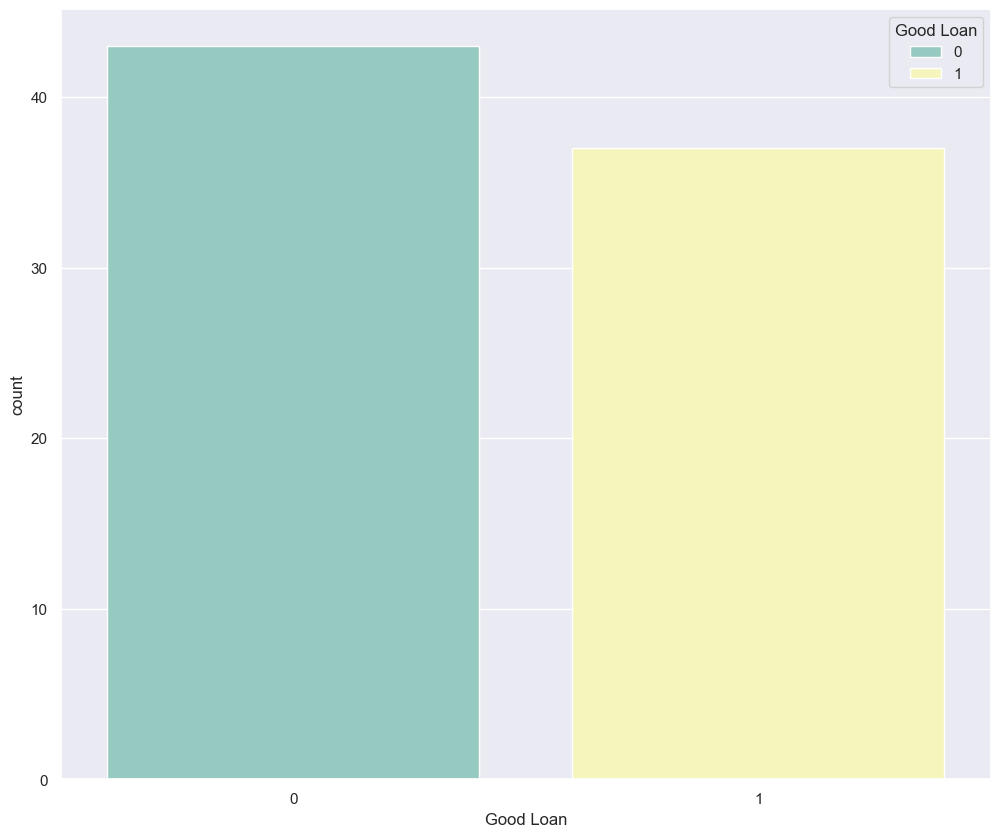

In [31]:
# Investigating the distr. of all y's 3


ax = sns.countplot(x = y_valid, hue= y_valid, palette="Set3")
plt.show()

## LOGISTIC REGRESSION

In [32]:
# Training my model

# class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

log_reg = LogisticRegression(random_state=10, solver='lbfgs')

log_reg.fit(X_train, y_train)


c:\Users\omodu\anaconda3\envs\morgpy\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [33]:
#### MY OWN THING ##### - preprocessing data 1

from sklearn import preprocessing

scaler_train = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler_train.transform(X_train)

scaler_test = preprocessing.StandardScaler().fit(X_test)

X_test_scaled = scaler_test.transform(X_test)

scaler_valid = preprocessing.StandardScaler().fit(X_valid)

X_valid_scaled = scaler_valid.transform(X_valid)

In [34]:
#### MY OWN THING ##### - preprocessing data 2

print(X_train_scaled)
print('\n')
print(X_train_scaled.mean(axis=0))       # axis in numpy, 0 for column, 1 for row

[[-0.731599 -1.085773 -0.426926 ... -0.568796 -0.702692 -0.340997]
 [0.720442 -0.818049 -0.426926 ... 1.758098 -0.702692 -0.340997]
 [-0.061264 -0.550324 -0.426926 ... -0.568796 1.423099 -0.340997]
 ...
 [-0.838051 1.680718 2.342325 ... -0.568796 1.423099 -0.340997]
 [1.246029 1.948443 -0.426926 ... 1.758098 -0.702692 -0.340997]
 [-0.637091 -1.264257 -0.426926 ... -0.568796 -0.702692 -0.340997]]


[0.000000 0.000000 0.000000 0.000000 0.000000 -0.000000 -0.000000
 -0.000000 0.000000 0.000000 -0.000000 0.000000 0.000000 -0.000000
 0.000000 -0.000000 -0.000000 0.000000 0.000000 0.000000 -0.000000
 -0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
 0.000000 0.000000 -0.000000 -0.000000 0.000000 -0.000000 -0.000000
 0.000000 0.000000 -0.000000 0.000000]


In [35]:
#### MY OWN THING ##### - preprocessing data 3

print(X_test_scaled)
print('\n')
print(X_test_scaled.mean(axis=0))

[[-0.051851 0.888686 -0.420084 ... -0.507801 -0.693889 2.531286]
 [3.631633 0.639406 -0.420084 ... -0.507801 -0.693889 2.531286]
 [-0.408021 -1.271748 -0.420084 ... 1.969276 -0.693889 -0.395056]
 ...
 [-0.488447 -0.690093 2.380476 ... -0.507801 -0.693889 -0.395056]
 [1.289338 0.140844 -0.420084 ... -0.507801 -0.693889 -0.395056]
 [-0.690276 -0.856280 -0.420084 ... -0.507801 1.441153 -0.395056]]


[0.000000 0.000000 0.000000 -0.000000 0.000000 -0.000000 -0.000000
 0.000000 0.000000 0.000000 -0.000000 -0.000000 0.000000 0.000000
 -0.000000 0.000000 0.000000 0.000000 0.000000 -0.000000 -0.000000
 -0.000000 0.000000 0.000000 -0.000000 0.000000 0.000000 0.000000 0.000000
 0.000000 0.000000 0.000000 -0.000000 -0.000000 0.000000 0.000000 0.000000
 0.000000 0.000000 -0.000000]


In [36]:
#### MY OWN THING ##### - preprocessing data 4

print(X_valid_scaled)
print('\n')
print(X_valid_scaled.mean(axis=0))

[[-0.605961 -0.617085 2.380476 ... 2.081666 -0.754074 -0.284747]
 [-0.572132 -0.441402 -0.420084 ... 2.081666 -0.754074 -0.284747]
 [0.138936 -0.617085 -0.420084 ... 2.081666 -0.754074 -0.284747]
 ...
 [-0.388998 -0.617085 -0.420084 ... -0.480384 1.326130 -0.284747]
 [-0.824877 0.437010 -0.420084 ... -0.480384 -0.754074 -0.284747]
 [-0.579288 -0.968450 -0.420084 ... -0.480384 -0.754074 -0.284747]]


[0.000000 0.000000 0.000000 -0.000000 0.000000 -0.000000 -0.000000
 0.000000 0.000000 0.000000 -0.000000 -0.000000 0.000000 0.000000 0.000000
 -0.000000 -0.000000 -0.000000 0.000000 0.000000 -0.000000 0.000000
 -0.000000 -0.000000 -0.000000 -0.000000 0.000000 -0.000000 0.000000
 -0.000000 -0.000000 0.000000 0.000000 0.000000 -0.000000 0.000000
 -0.000000 0.000000 0.000000 0.000000]


In [37]:
#### MY OWN THING ##### - retrying the fit

log_reg.fit(X_train_scaled, y_train)   #output doesn't give those warnings as before. will try to run rest of tutorial on both regular and scaled data



LogisticRegression(random_state=10)

In [38]:
##### BACK TO TUTORIAL #####

# Methods we can use in Log. reg.

# 1. predict -: Predict class labels for samples in X

print (log_reg.predict (X_train))        #output shows only 0s, is this due to the warning given?
print('\n')
print(log_reg.predict(X_train_scaled))   # output shows 0s and 1s and is quite similar to the tutorial

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [39]:
print(log_reg.predict(X_train_scaled).shape)
print(log_reg.predict(X_train).shape)

(720,)
(720,)


In [40]:
# will only move forward with scaled value for X_train

y_pred = log_reg.predict(X_train_scaled)

In [41]:
# Methods we can use in Log. reg

#2.  predict_proba - Prob. estimates

log_reg.predict_proba(X_train)  #predicts Prb of class being 0 or 1

#output shows 1 (or 100%) in the '0' column

array([[1.000000, 0.000000],
       [1.000000, 0.000000],
       [1.000000, 0.000000],
       ...,
       [1.000000, 0.000000],
       [1.000000, 0.000000],
       [1.000000, 0.000000]], shape=(720, 2))

In [42]:
# Methods we can use in Log. reg

#2.  predict_proba - Prob. estimates

log_reg.predict_proba(X_train_scaled)  #predicts Prb of class being 0 or 1

#output is normal. I should just proceed with X_train scaled (Prbs should coincide with outpuy in 'predict' above (cell 84 above))...
# ... The first set of Prbs [0.592240, 0.407760], show that 0 is more likely and the next set [0.901842, 0.098158], show that 0 is more likely and the 3rd set [0.339667, 0.660333] show that 1 is more likely. JUST LIKE THE OUTPUT from "predict" above )

# I read online that the reason for X_train output is indeed the failure to converge
# Possible solns listed are:
# Increase the number of iterations (max_iter = 3000 (maybe?))
# Try a different optimizer (other than 'lbfgs')
# Scale your data (like I DID, See preprocessing)
# Add engineered features
# Data pre-processing: (#### WHAT I've DONE WITH SCALED DATA)
# Add more data

array([[0.592240, 0.407760],
       [0.901842, 0.098158],
       [0.339667, 0.660333],
       ...,
       [0.839021, 0.160979],
       [0.920853, 0.079147],
       [0.145499, 0.854501]], shape=(720, 2))

In [43]:
pred_proba = log_reg.predict_proba(X_train_scaled)

In [44]:
# Methods we can use in Log. reg

#3.  coef_ - Coefficient of features in the decision function (i.e. in the formula for log. reg. )

print (log_reg.coef_)
print (log_reg.coef_.shape)  # should have 40 features given that we selected 40 columns previously

[[-0.368151 0.069542 -0.490133 0.428863 0.108043 -0.105427 -0.164885
  0.541664 -0.467006 0.104764 0.005598 -0.291028 0.197120 -0.046309
  0.122204 -0.095414 -0.113927 0.067351 0.059491 -0.562661 0.215982
  0.149821 0.227599 0.323897 -0.161210 -0.064893 0.211988 -0.000584
  0.028903 0.025580 -0.113844 0.088772 0.010813 -0.063689 0.063689
  -0.325077 0.239569 0.023060 -0.004316 0.172102]]
(1, 40)


In [45]:
# Accuracy on train

print("The Training Accuracy of regular training data is: ", log_reg.score(X_train, y_train))
print("The Training Accuracy of scaled training data is: ", log_reg.score(X_train_scaled, y_train))

# Accuracy on test

print("The Training Accuracy of regular testing data is: ", log_reg.score(X_test, y_test))
print("The Training Accuracy of scaled testing data is: ", log_reg.score(X_test_scaled, y_test))


# See  outputs for both scaled data is better

The Training Accuracy of regular training data is:  0.5375
The Training Accuracy of scaled training data is:  0.7833333333333333
The Training Accuracy of regular testing data is:  0.53
The Training Accuracy of scaled testing data is:  0.785


In [46]:
# Classification report

print(classification_report(y_train, y_pred))  # note that "accuracy" output is same as that seen in the scaled data accuracy above
                                               # See that support is the sum total of observations (720)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       387
           1       0.77      0.76      0.77       333

    accuracy                           0.78       720
   macro avg       0.78      0.78      0.78       720
weighted avg       0.78      0.78      0.78       720



In [47]:
# Another method to check the 'fitness' of our model is by using the confusion matrix

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0, vmax=1, annot=True, annot_kws={'size': 50})
    else:
        sns.heatmap(cm, vm=0, vmax=1)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


In [48]:
#Visualise the confusion matrix

cm = confusion_matrix(y_train, y_pred)

cm

array([[310,  77],
       [ 79, 254]])

In [49]:
#Visualise the confusion matrix as % 1

cm_prop = (cm/ cm.sum(axis=1)) * 100

cm_prop

# THIS IS WRONG METHOD!!!

array([[80.103359, 23.123123],
       [20.413437, 76.276276]])

In [50]:
#Visualise the confusion matrix as % 2

cm_norm = cm/ cm.sum(axis=1).reshape(-1,1)  # in Numpy, axis = 0: mean column-wise operation and axis = 1 means row-wise op.
                                            # .reshape(-1,1): This reshapes the result of the cm.sum(axis=1) operation.
                                            # -1: This means "infer the dimension." Since we're reshaping to a 2D array, and we know we want 1 column, -1 tells NumPy to figure out the correct number of rows based on the original data.
                                            # 1: This specifies that the reshaped array should have 1 column.
                                            # The reshaping is crucial because it turns the row sums into a column vector
cm_norm

array([[0.801034, 0.198966],
       [0.237237, 0.762763]])

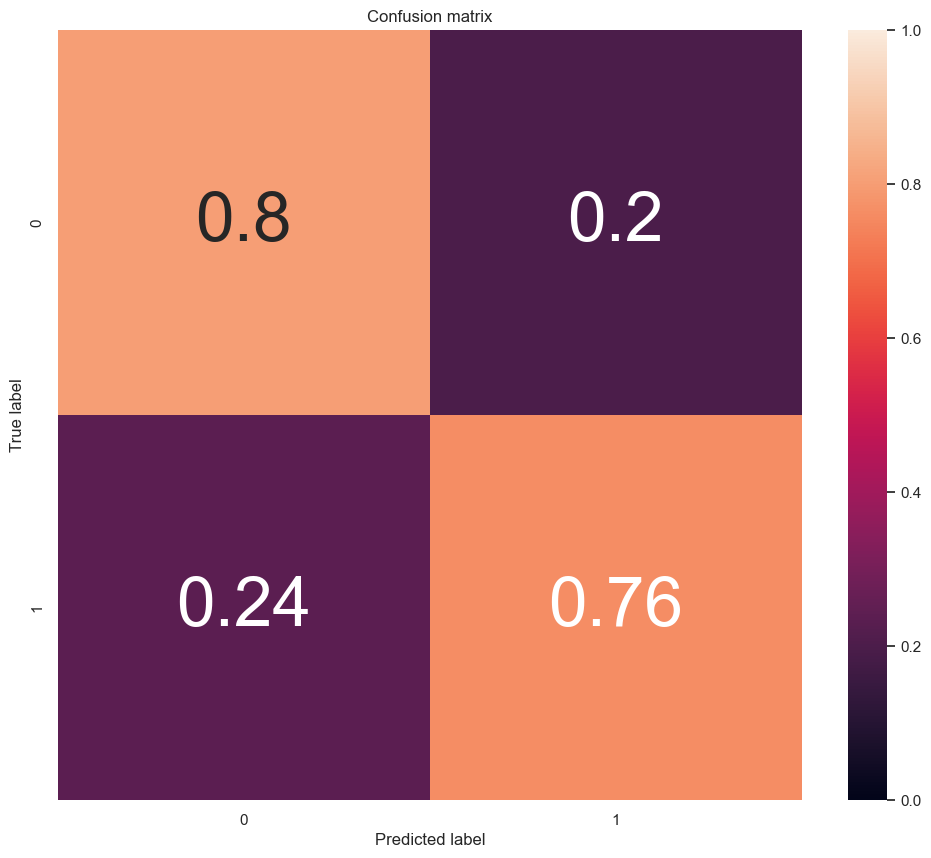

In [51]:
#Visualising cm

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

plt.show()

In [52]:
#See output of classes - MY LEARNING

log_reg.classes_

array([0, 1])

In [53]:
cm

array([[310,  77],
       [ 79, 254]])

In [54]:
cm.sum(axis=1)  #sums each vector across row

array([387, 333])

In [55]:
cm.sum(axis=0) #sums each vector along column

array([389, 331])

In [56]:
np.diag (cm)  #provide value of diagonals

array([310, 254])

In [57]:
#Calculating the false positives, false negatives, true positive and true negatives

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Calculating Sensitivity/hit rate/ recall/ True positive rate

TPR = TP/(TP+FN)

print("Sensitivity (TPR) is: ", TPR)

# Calculating Precision or positive predictive value

PPV = TP/(TP + FP)

print("Precision (PPV) is: ", PPV)

# Calculating False positive rate or False alarm rate

FPR = FP/ (FP + TN)

print("Fall positive rate/Type 1 (FPR) is: ", FPR)

# Calculating the Negative rate/Miss rate

FNR = FN/(TP+FN)

print("The False negative rate is: ", FNR)



## Total averages: 
print ("")
print("The Average Sensitivity (TPR) is: ", TPR.sum()/2)
print("The Average Precision (PPV) is: ", PPV.sum()/2)
print("The Average Fall positive rate/Type 1 (FPR) is: ", FPR.sum()/2)
print("The Average  False negative rate is: ", FNR.sum()/2)




Sensitivity (TPR) is:  [0.801034 0.762763]
Precision (PPV) is:  [0.796915 0.767372]
Fall positive rate/Type 1 (FPR) is:  [0.237237 0.198966]
The False negative rate is:  [0.198966 0.237237]

The Average Sensitivity (TPR) is:  0.7818981772470145
The Average Precision (PPV) is:  0.7821433841517875
The Average Fall positive rate/Type 1 (FPR) is:  0.21810182275298556
The Average  False negative rate is:  0.21810182275298556


In [58]:
# from log reg_1 tutorial:

# print(confusion_matrix(y_test, y_pred)) # output error because I split this dataset in diff. ways.

### Logarithmic loss - or Log Loss - or cross-entropy loss

- Log Loss is an error metric
- This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of the true labels given a probabilistic classifier’s predictions. 

- Why is it important? For example, imagine having 2 models / classifiers (eg one log. reg. and one tree classifier) that both predict one observation correctly (Good Loan). However, 1 classifier has a predicted probability of 0.54 and the other 0.95. Which one will you choose? Classification Accuracy will not help here as both will get 100% on an accuracy test

- Doc: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html

In [59]:
# Running log loss on training

print("The Log Loss on the training dataset is: ", log_loss(y_train, pred_proba))

# Running log loss on testing

pred_proba_test = log_reg.predict_proba(X_test_scaled)
print("The Log Loss on the testing dataset is: ", log_loss(y_test, pred_proba_test))


#Log loss is higher in the unseen/testing data. Expected

The Log Loss on the training dataset is:  0.45094733342278204
The Log Loss on the testing dataset is:  0.482818361646849


### Hyper Parameter Tuning

- We will loop over parameter C (Inverse of regularization strength).
- Inverse of regularization strength helps to avoid overfitting - it penalizes large values of your parameters
- It also helps to find Global Minimum by moving to better "solutions" from local minimum to global minimum
- The values of C to search should be n-equally-spaced values in log space ranging from 1e-5 to 1e5

In [60]:
## Creating a range for C values1

np.geomspace(1e-5, 1e5, num=20) # Return numbers spaced evenly on a log scale (a geometric progression).
                                # This is similar to logspace, but with endpoints specified directly.
                                # Each output sample is a constant multiple of the previous.

# output shows 20 numbers in array ranging from decimals (to 5 dp -> 1e-5) to whole numbers to the order of 1e5 (this is the last number)

array([0.000010, 0.000034, 0.000113, 0.000379, 0.001274, 0.004281,
       0.014384, 0.048329, 0.162378, 0.545559, 1.832981, 6.158482,
       20.691381, 69.519280, 233.572147, 784.759970, 2636.650899,
       8858.667904, 29763.514416, 100000.000000])

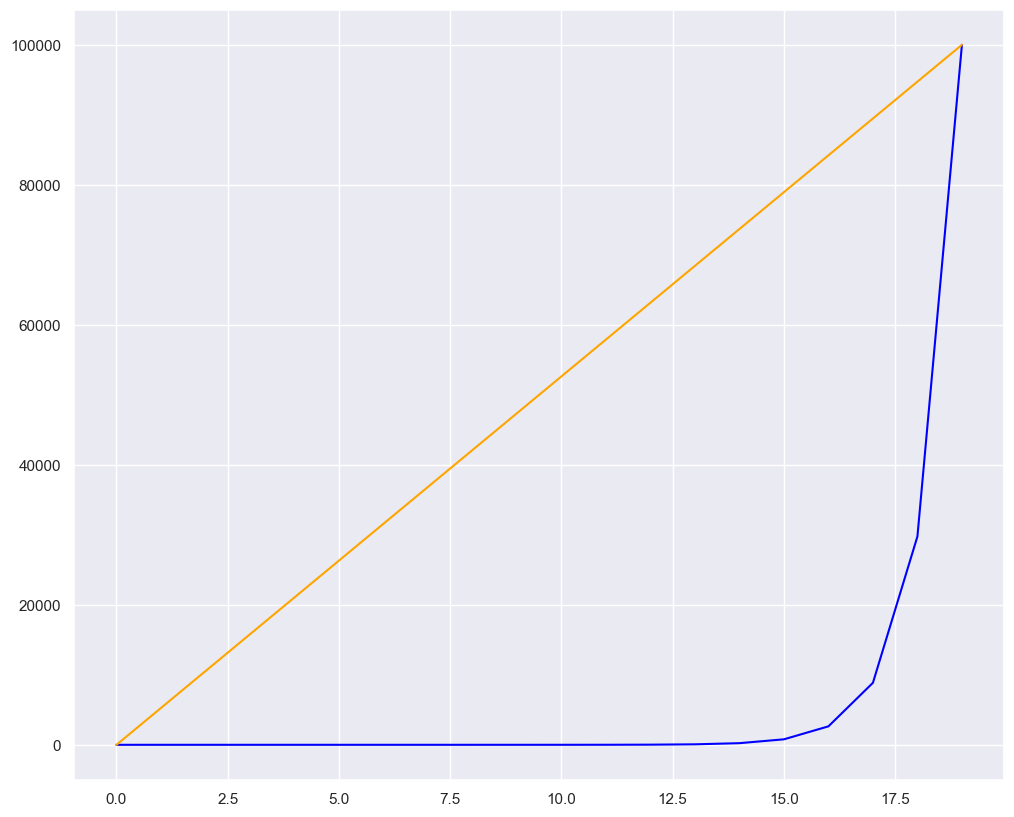

In [61]:
## #Plotting range for C values


plt.plot(np.geomspace(1e-5, 1e5, num=20), color = 'blue') # uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20), color = 'orange') # uniformly distributed in linear space
plt.show()

In [62]:
#Looping over the parameters

C_list = np.geomspace(1e-5, 1e5, num=20)

# Classification accuracy
CA =[]
Logarithmic_loss = []

for c in C_list:
    log_reg2 = LogisticRegression(random_state=10, solver= 'lbfgs', C=c)  # C: The Inverse of regularization strength. It must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
    log_reg2.fit(X_train_scaled, y_train)
    score = log_reg2.score(X_test_scaled, y_test)
    CA.append(score)
    print("The Classification accuracy (CA) of C parameter {} is {}:".format(c, score))
    pred_proba_test = log_reg2.predict_proba(X_test_scaled)
    log_loss2 = log_loss(y_test, pred_proba_test)
    Logarithmic_loss.append(log_loss2)
    print("The Log Loss of C parameter {} is {}:".format(c, log_loss2))

# We need the lowest loss. See how we parse the output in the coming cells below


The Classification accuracy (CA) of C parameter 1e-05 is 0.53:
The Log Loss of C parameter 1e-05 is 0.6900147515420795:
The Classification accuracy (CA) of C parameter 3.359818286283781e-05 is 0.53:
The Log Loss of C parameter 3.359818286283781e-05 is 0.6866778530465615:
The Classification accuracy (CA) of C parameter 0.00011288378916846884 is 0.53:
The Log Loss of C parameter 0.00011288378916846884 is 0.6761514854301717:
The Classification accuracy (CA) of C parameter 0.000379269019073225 is 0.635:
The Log Loss of C parameter 0.000379269019073225 is 0.647098741585128:
The Classification accuracy (CA) of C parameter 0.0012742749857031334 is 0.725:
The Log Loss of C parameter 0.0012742749857031334 is 0.5897667784808529:
The Classification accuracy (CA) of C parameter 0.004281332398719391 is 0.755:
The Log Loss of C parameter 0.004281332398719391 is 0.5259584359529793:
The Classification accuracy (CA) of C parameter 0.01438449888287663 is 0.785:
The Log Loss of C parameter 0.014384498882

In [63]:
### putting outcomes from above in a table 1

# Let's see what our created lists looks like first
print(CA)
print("")
print (Logarithmic_loss)



[0.53, 0.53, 0.53, 0.635, 0.725, 0.755, 0.785, 0.785, 0.78, 0.78, 0.785, 0.785, 0.785, 0.785, 0.785, 0.785, 0.785, 0.785, 0.785, 0.785]

[0.6900147515420795, 0.6866778530465615, 0.6761514854301717, 0.647098741585128, 0.5897667784808529, 0.5259584359529793, 0.48887818690557694, 0.4791434110150514, 0.4803960381623665, 0.48229420780721854, 0.4831322852904048, 0.4834137328117565, 0.48350061752801454, 0.4835267617339791, 0.4835345685741861, 0.4835368944207664, 0.4835375868745085, 0.48353779299080457, 0.48353785433982865, 0.48353787259959335]


In [64]:
# putting outcomes from above in a table2

# reshaping the list

CA2 = np.array(CA).reshape(20,)                     ### np.array(CA): This part ensures that CA is indeed a NumPy array.
                                                    # If CA is already a NumPy array, this does nothing.  However, if CA is a Python list(***it IS***) or some other array-like object, this converts it to a NumPy array.  
                                                    # This is important because the .reshape() method works on NumPy arrays, not standard Python lists.
                                                    ### .reshape(20,): This is the core of the operation. The .reshape() method changes the shape of the NumPy array.
                                                    # (20,): is a tuple that specifies the desired shape. This indicates that the reshaped array should have 20 elements.
                                                    # ,: The comma (above) is crucial. It makes (20,) a tuple. Reshaping requires a tuple to define the new shape, even if it's one-dimensional. 
                                                    # If we just wrote (20), it would not be interpreted as a shape but rather as an integer inside the paranthesis.
                                                    # In summary: CA2 = np.array(CA).reshape(20,) takes the array CA, ensures it's a NumPy array, and then reshapes it into a one-dimensional array containing exactly 20 elements.

Logarithmic_loss2 = np.array(Logarithmic_loss).reshape(20,)

print(CA2)
print("")
print(Logarithmic_loss2)

[0.530000 0.530000 0.530000 0.635000 0.725000 0.755000 0.785000 0.785000
 0.780000 0.780000 0.785000 0.785000 0.785000 0.785000 0.785000 0.785000
 0.785000 0.785000 0.785000 0.785000]

[0.690015 0.686678 0.676151 0.647099 0.589767 0.525958 0.488878 0.479143
 0.480396 0.482294 0.483132 0.483414 0.483501 0.483527 0.483535 0.483537
 0.483538 0.483538 0.483538 0.483538]


In [65]:
# putting outcomes from above in a table3

# zip

# recall: # The zip() function in Python is used to combine multiple iterables (like lists, tuples, etc.) into a single iterator of tuples.

outcomes = zip(C_list, CA2, Logarithmic_loss2)

# make dataframe

df_outcomes =pd.DataFrame(outcomes, columns=["C_List", "CA2", "Logarithmic_loss2"])

df_outcomes

,C_List,CA2,Logarithmic_loss2
0,0.000010,0.530,0.690015
1,0.000034,0.530,0.686678
2,0.000113,0.530,0.676151
3,0.000379,0.635,0.647099
4,0.001274,0.725,0.589767
5,0.004281,0.755,0.525958
6,0.014384,0.785,0.488878
7,0.048329,0.785,0.479143
8,0.162378,0.780,0.480396
9,0.545559,0.780,0.482294


In [66]:
#Now we have our C_list, CA and log loss in a table, we can order the data to find the lowest numbers we want

df_outcomes.sort_values('Logarithmic_loss2', ascending= True).reset_index()


#Fortunately, we have both highest classification accuracy and lowest log_loss for the same C number. 
#Tutorial advises, however, that in situations of uncertainty, the log_loss is a better parameter to rely on for testing unseen data (test data)

# My numbers differ from the tutorial however!!!!!!!!!!!!!!!!!!!!!!
# Must be due to my scaling of the data. 
# I do have a lower log loss than the tutor does.

,index,C_List,CA2,Logarithmic_loss2
0,7,0.048329,0.785,0.479143
1,8,0.162378,0.780,0.480396
2,9,0.545559,0.780,0.482294
3,10,1.832981,0.785,0.483132
4,11,6.158482,0.785,0.483414
5,12,20.691381,0.785,0.483501
6,13,69.519280,0.785,0.483527
7,14,233.572147,0.785,0.483535
8,15,784.759970,0.785,0.483537
9,16,2636.650899,0.785,0.483538


In [67]:
### Another way of identifying the best C parameter

# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with built-in cross-validation to find out the optimal C parameter

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import  KFold

kf = KFold(n_splits=3, random_state=0, shuffle=True)


# Log Reg CV

log_reg3 = LogisticRegressionCV(cv=kf, random_state=15, Cs= C_list)

log_reg3.fit(X_train_scaled, y_train)

print("The CA is: ", log_reg3.score(X_test_scaled, y_test))

pred_proba_test3 = log_reg3.predict_proba(X_test_scaled)
log_loss3 = log_loss(y_test, pred_proba_test3)

print("The Logrithmic loss is: ", log_loss3)


print("The Optimal C parameter is: ", log_reg3.C_)

#outputs shows a good match with manual method!! 

# all except the optimal C are a good match ( I tried an example without cross-validation[i.e. "cv=kf"], and got same CA and Log_loss, but diff. C [C=1.832981])

# The tutorial is a bit diff. but not bad

# It is upto the user to use either method

The CA is:  0.785
The Logrithmic loss is:  0.4834059018834673
The Optimal C parameter is:  [6.158482]


### K-fold cross validation:

- Advantage: K-fold cross validation uses all the training data to train the model, by applying k different splits; repeated train-test splits converge to the true accuracy given that the training data is representable for the underlying distribution; however in practise this is often overoptimistic.

- Disadvantage: The disadvantage of this method is that the training algorithm has to be rerun from the beginning k times, which means it takes k times as much computation to get an evaluation. Additionally, if you want to test the performance on a completely new dataset that the algorithm has never seen (the testing data), you cannot do this with k-fold cross validation.

### Hold-out:

- Advantage: The advantage of Hold-out is that you can test how your model performs on completely unseen data that you haven't used when training the model. Additionally, Hold-out is usually much faster and less computationally expensive. 

- Disadvantage: The evaluation may depend heavily on which data points end up in the training set and which end up in the test set, and thus the evaluation may be significantly different depending on how the division is made.

The Classification accuracy (CA) of C parameter 1e-05 is 0.53:
The Log Loss of C parameter 1e-05 is 0.6900147515420795:



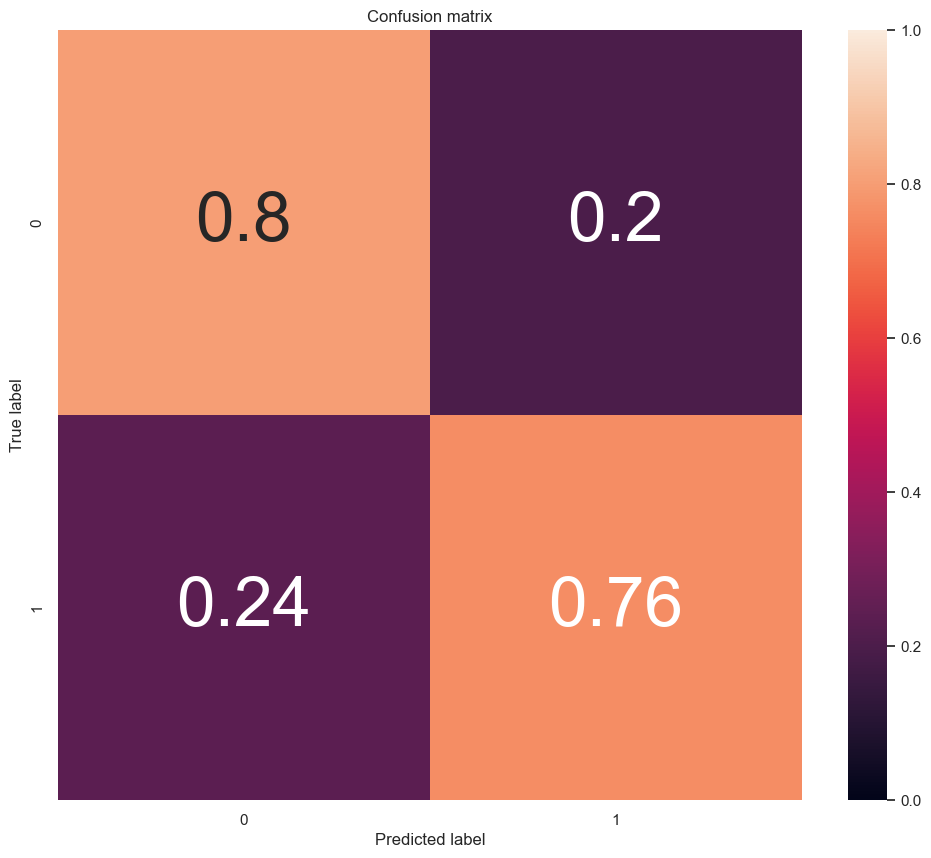

The Classification accuracy (CA) of C parameter 3.359818286283781e-05 is 0.53:
The Log Loss of C parameter 3.359818286283781e-05 is 0.6866778530465615:



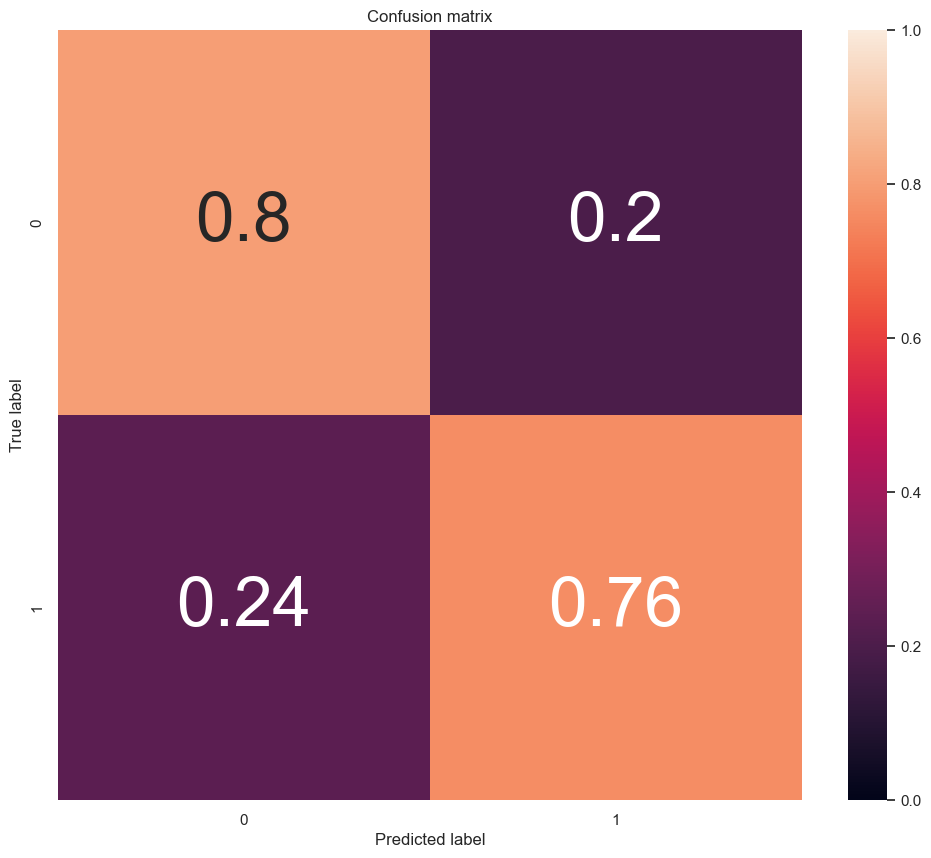

The Classification accuracy (CA) of C parameter 0.00011288378916846884 is 0.53:
The Log Loss of C parameter 0.00011288378916846884 is 0.6761514854301717:



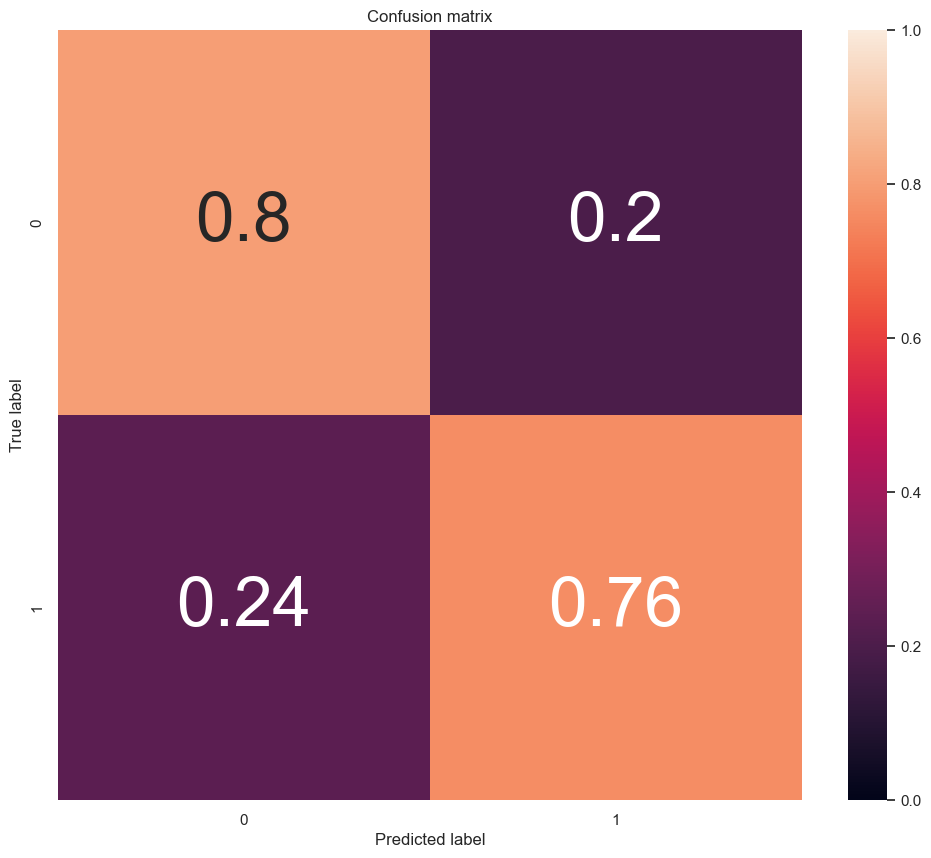

The Classification accuracy (CA) of C parameter 0.000379269019073225 is 0.635:
The Log Loss of C parameter 0.000379269019073225 is 0.647098741585128:



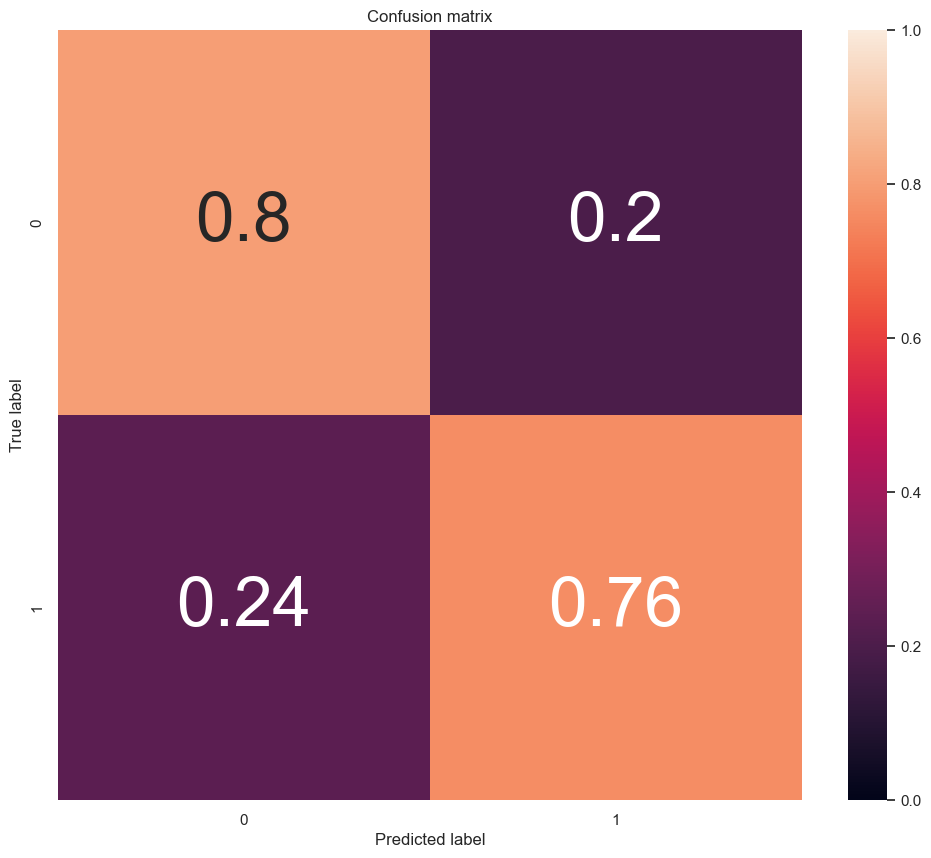

The Classification accuracy (CA) of C parameter 0.0012742749857031334 is 0.725:
The Log Loss of C parameter 0.0012742749857031334 is 0.5897667784808529:



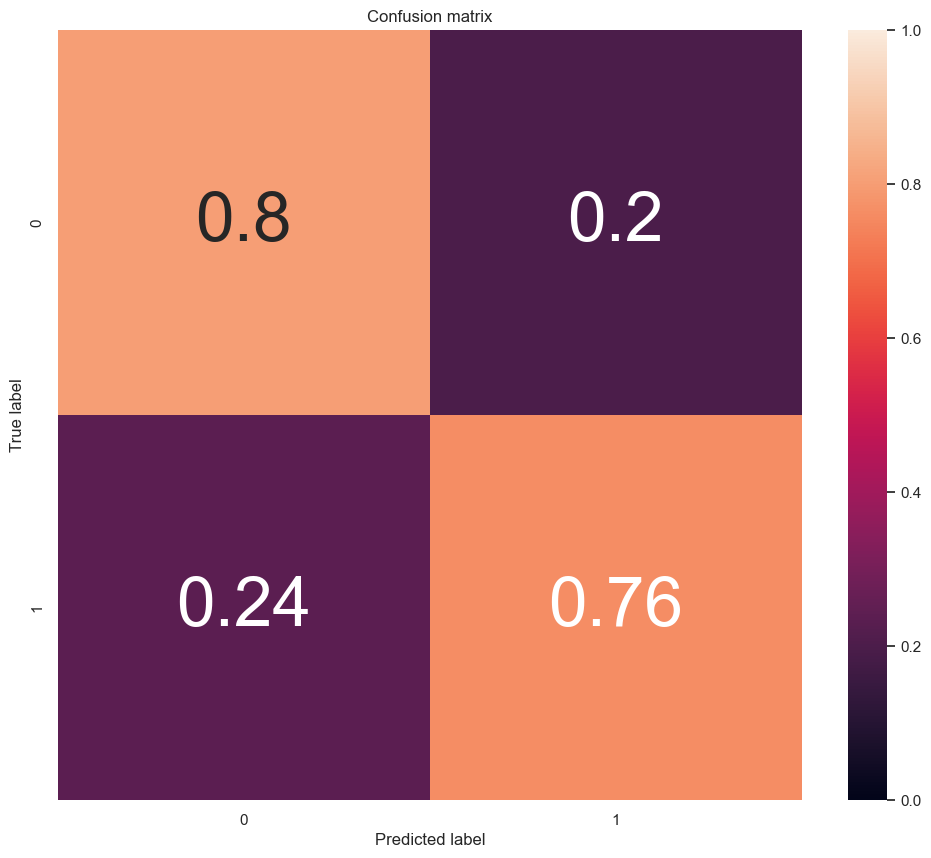

The Classification accuracy (CA) of C parameter 0.004281332398719391 is 0.755:
The Log Loss of C parameter 0.004281332398719391 is 0.5259584359529793:



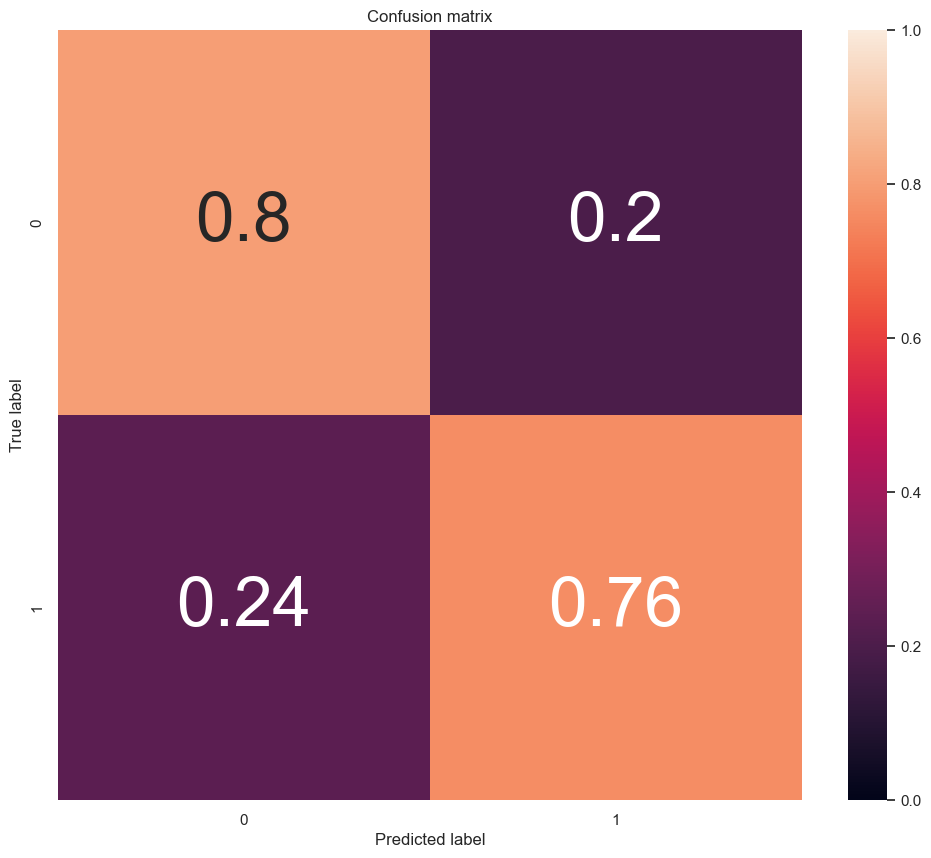

The Classification accuracy (CA) of C parameter 0.01438449888287663 is 0.785:
The Log Loss of C parameter 0.01438449888287663 is 0.48887818690557694:



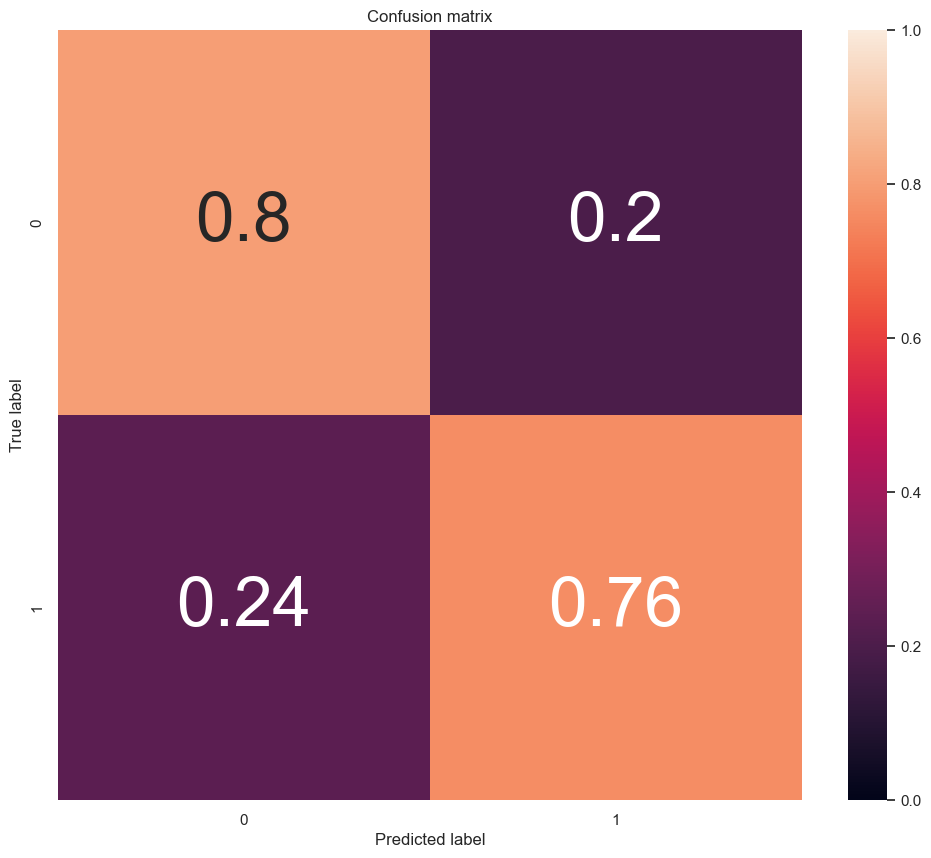

The Classification accuracy (CA) of C parameter 0.04832930238571752 is 0.785:
The Log Loss of C parameter 0.04832930238571752 is 0.4791434110150514:



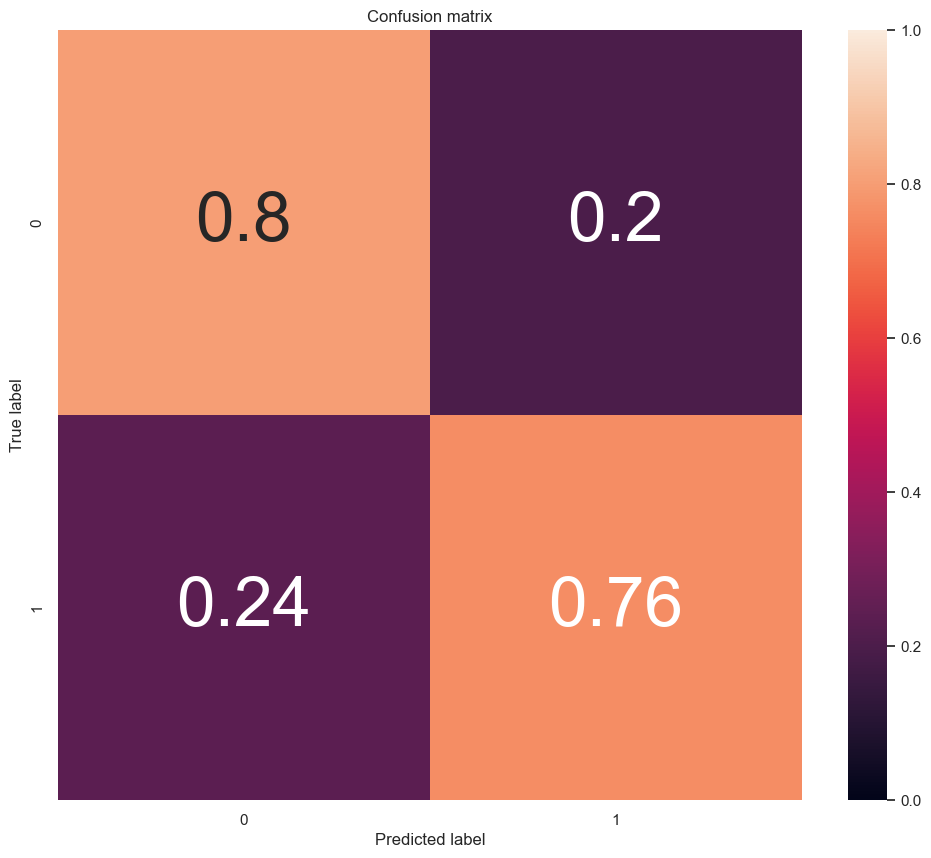

The Classification accuracy (CA) of C parameter 0.1623776739188721 is 0.78:
The Log Loss of C parameter 0.1623776739188721 is 0.4803960381623665:



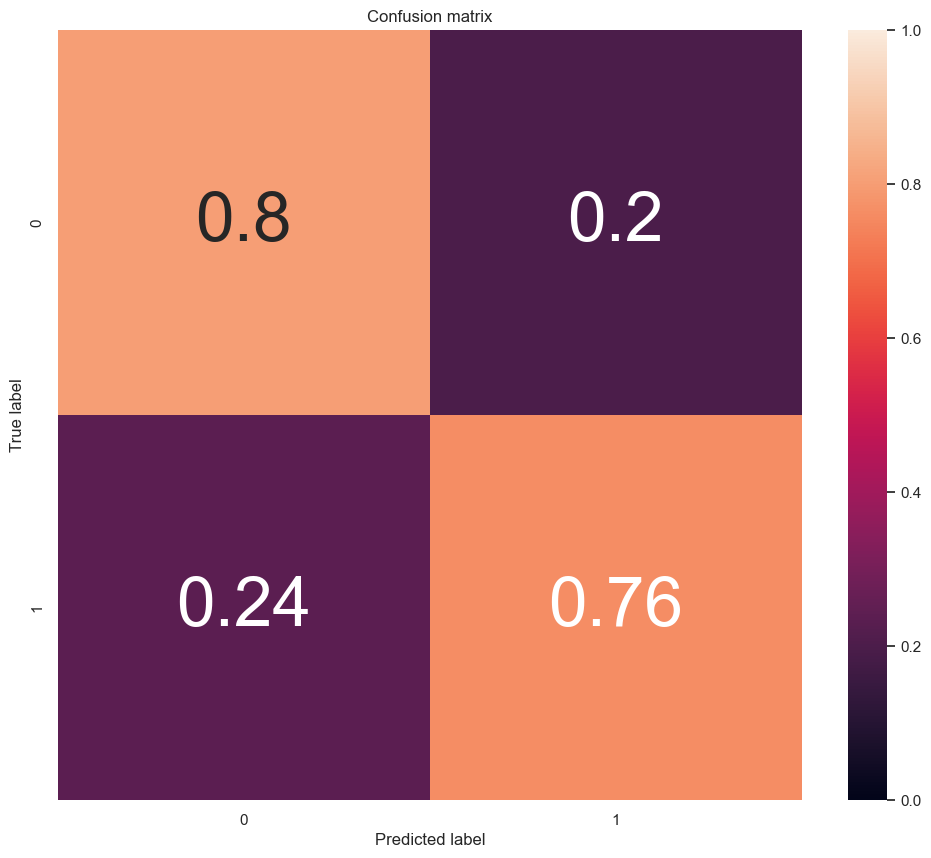

The Classification accuracy (CA) of C parameter 0.5455594781168515 is 0.78:
The Log Loss of C parameter 0.5455594781168515 is 0.48229420780721854:



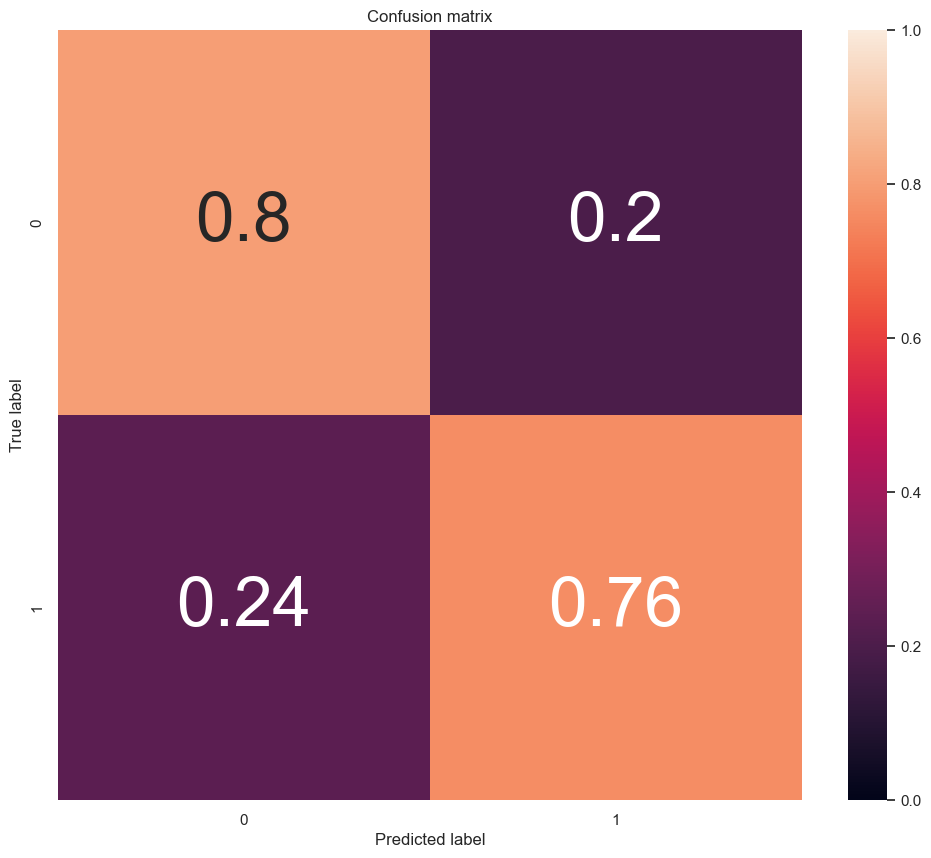

The Classification accuracy (CA) of C parameter 1.8329807108324339 is 0.785:
The Log Loss of C parameter 1.8329807108324339 is 0.4831322852904048:



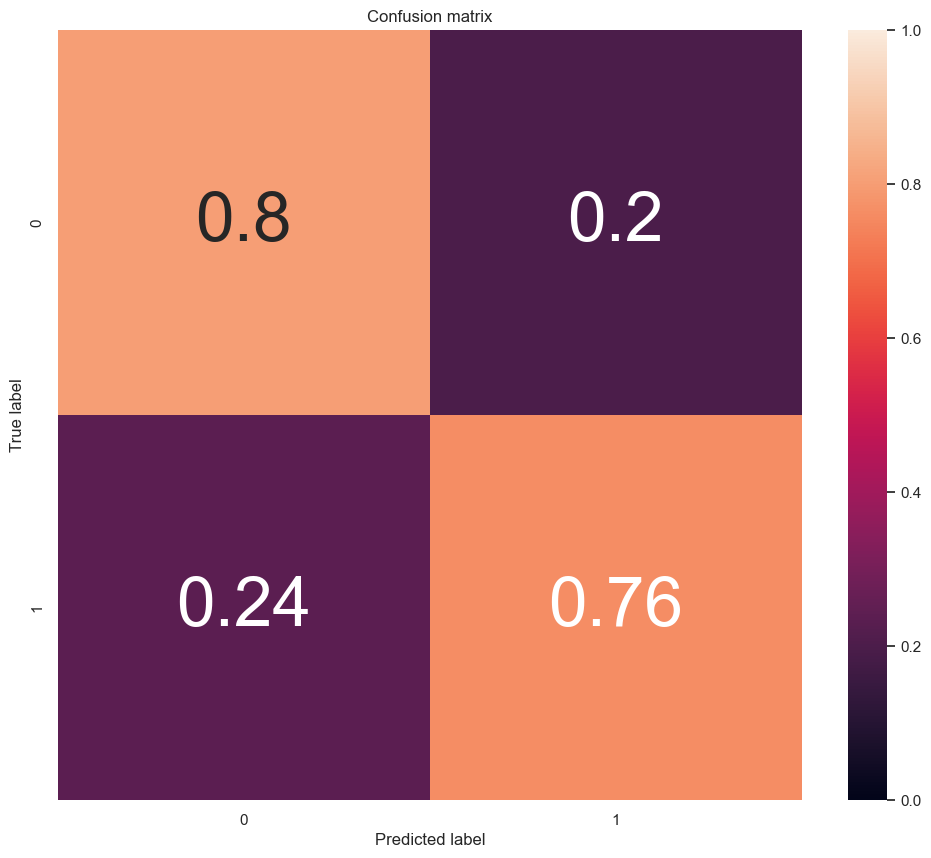

The Classification accuracy (CA) of C parameter 6.1584821106602545 is 0.785:
The Log Loss of C parameter 6.1584821106602545 is 0.4834137328117565:



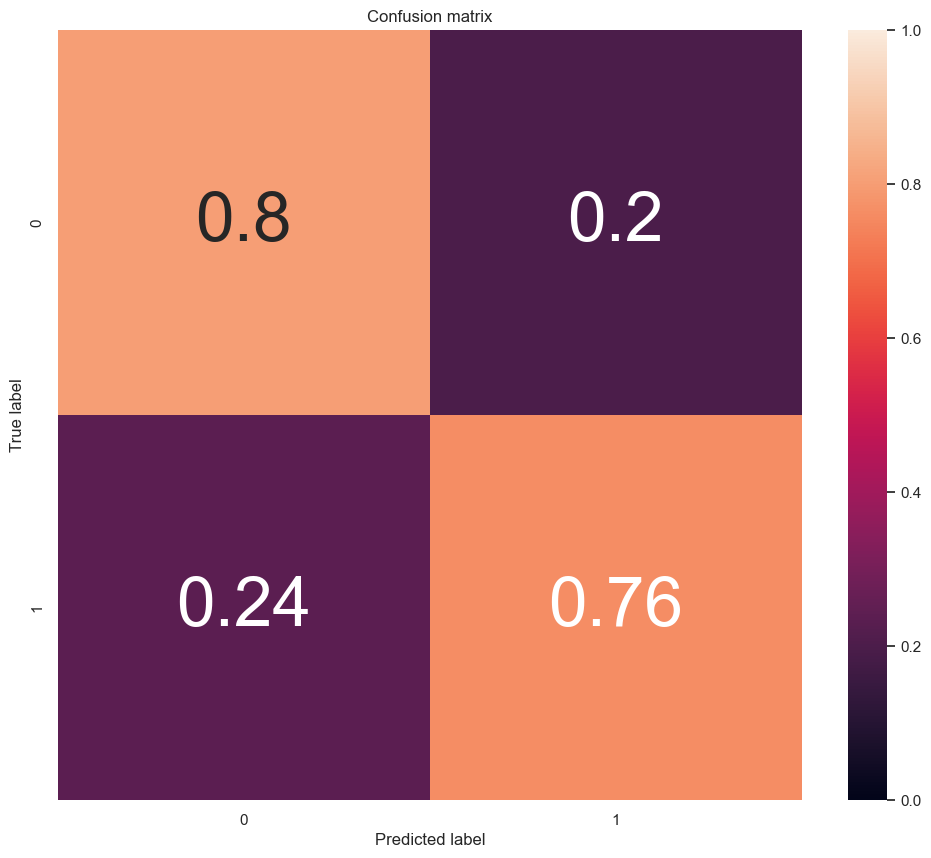

The Classification accuracy (CA) of C parameter 20.6913808111479 is 0.785:
The Log Loss of C parameter 20.6913808111479 is 0.48350061752801454:



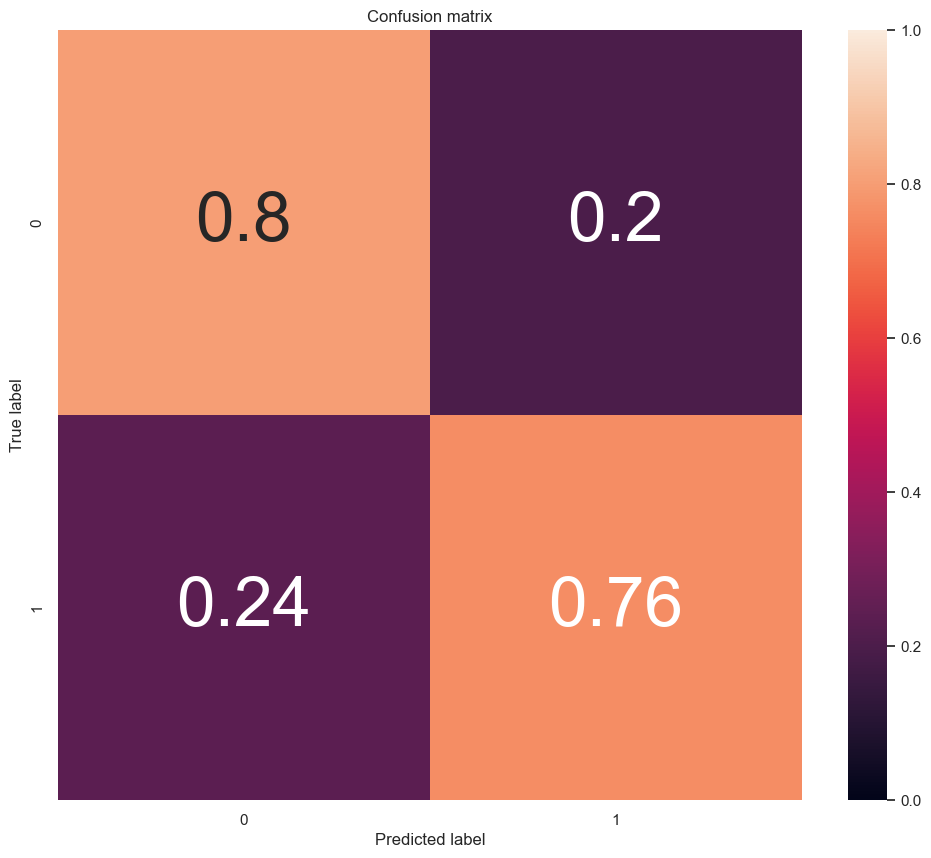

The Classification accuracy (CA) of C parameter 69.51927961775606 is 0.785:
The Log Loss of C parameter 69.51927961775606 is 0.4835267617339791:



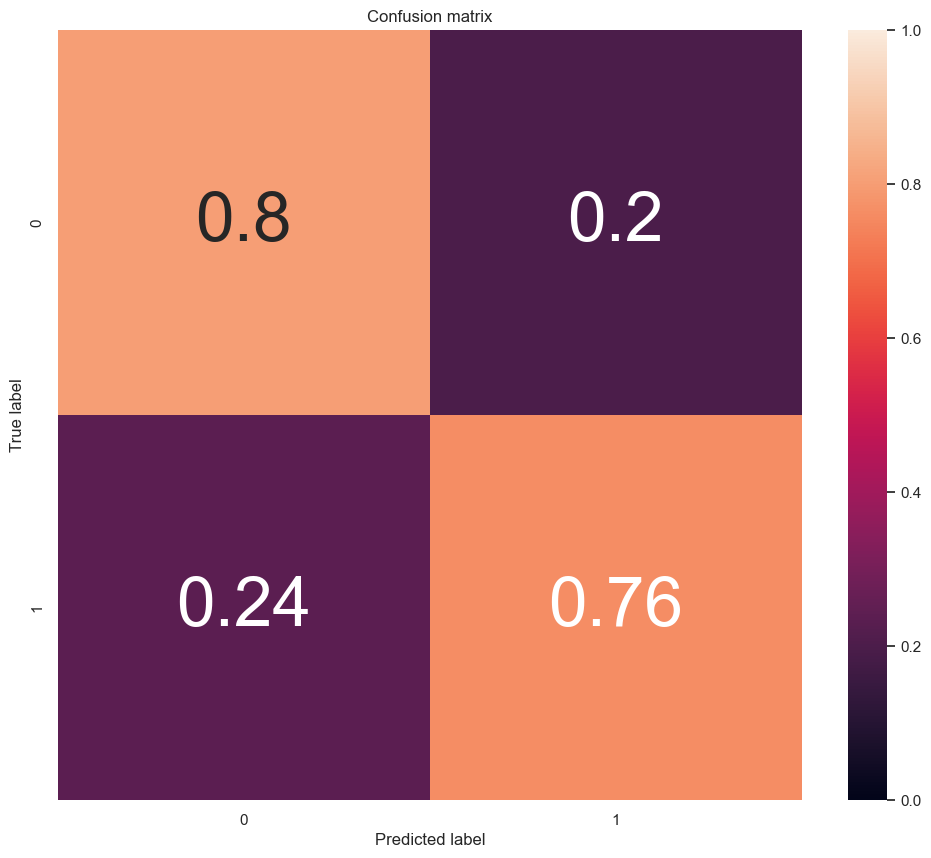

The Classification accuracy (CA) of C parameter 233.57214690901213 is 0.785:
The Log Loss of C parameter 233.57214690901213 is 0.4835345685741861:



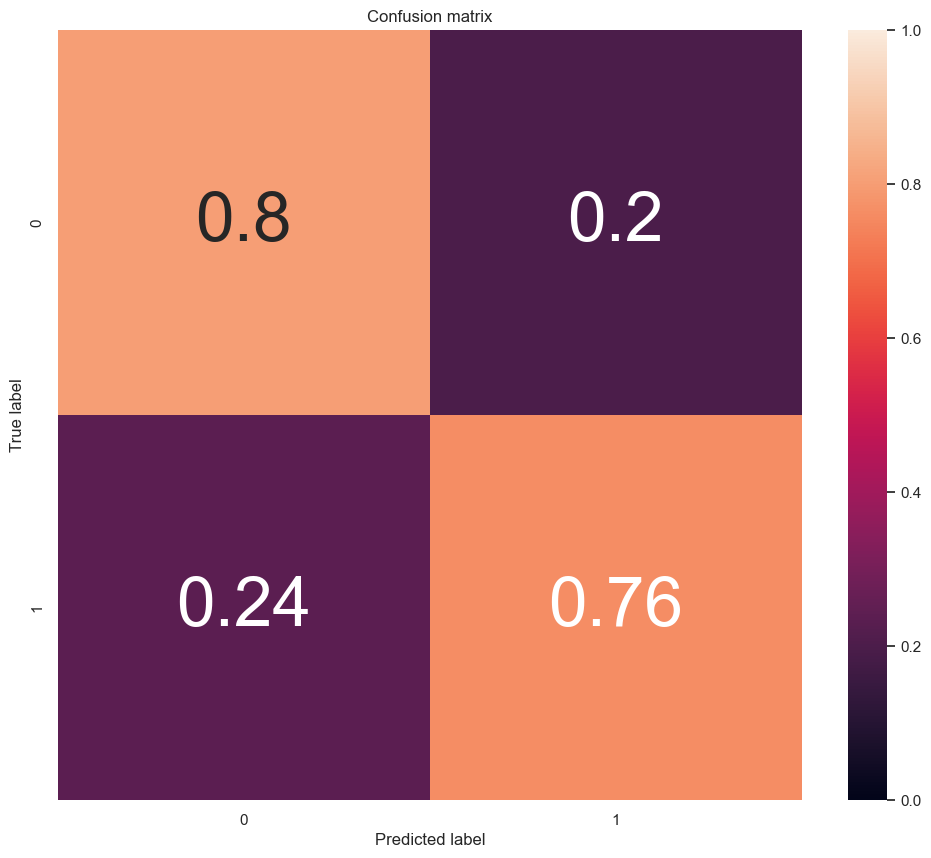

The Classification accuracy (CA) of C parameter 784.7599703514607 is 0.785:
The Log Loss of C parameter 784.7599703514607 is 0.4835368944207664:



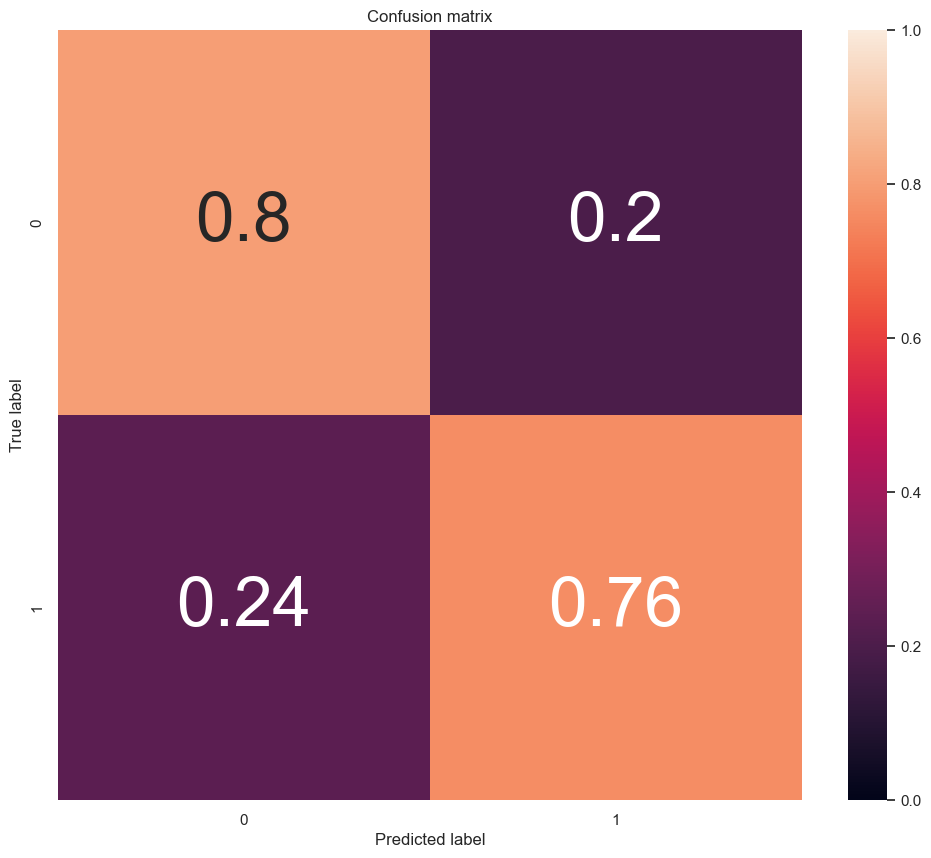

The Classification accuracy (CA) of C parameter 2636.6508987303555 is 0.785:
The Log Loss of C parameter 2636.6508987303555 is 0.4835375868745085:



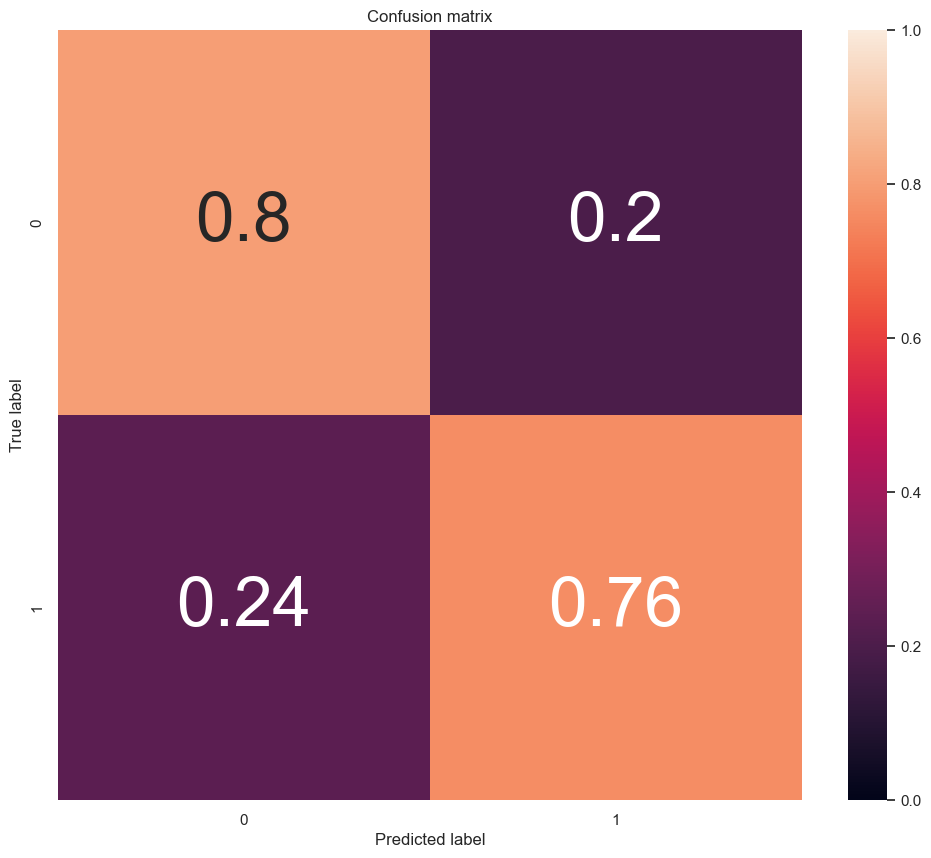

The Classification accuracy (CA) of C parameter 8858.667904100832 is 0.785:
The Log Loss of C parameter 8858.667904100832 is 0.48353779299080457:



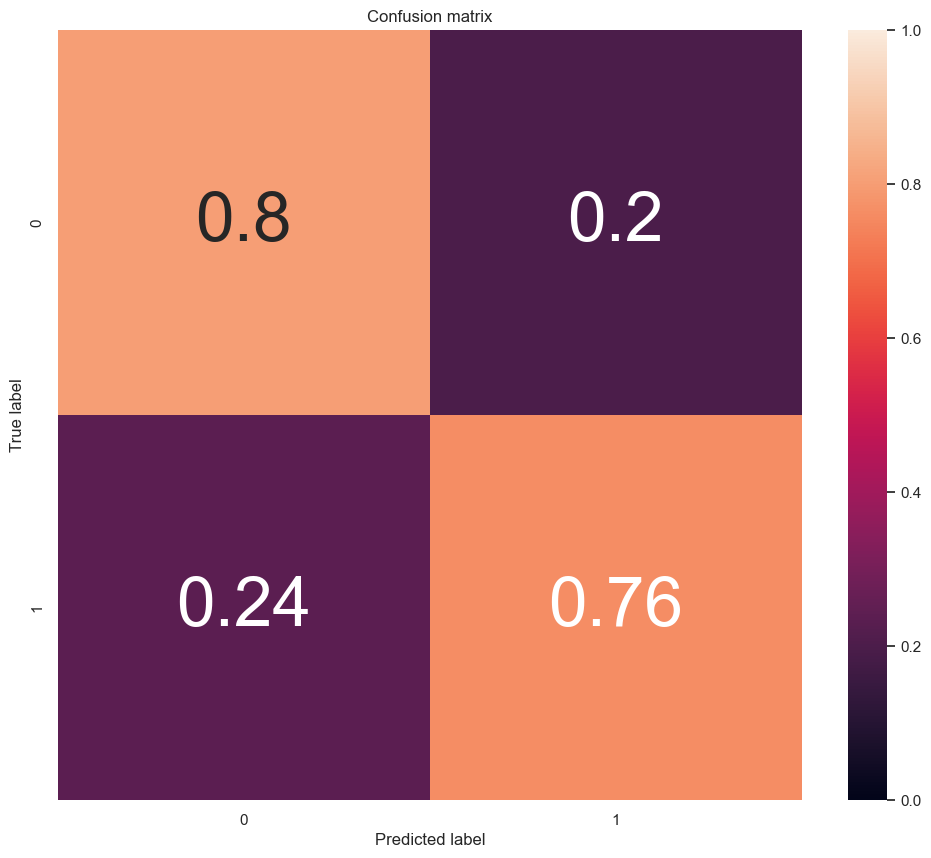

The Classification accuracy (CA) of C parameter 29763.51441631313 is 0.785:
The Log Loss of C parameter 29763.51441631313 is 0.48353785433982865:



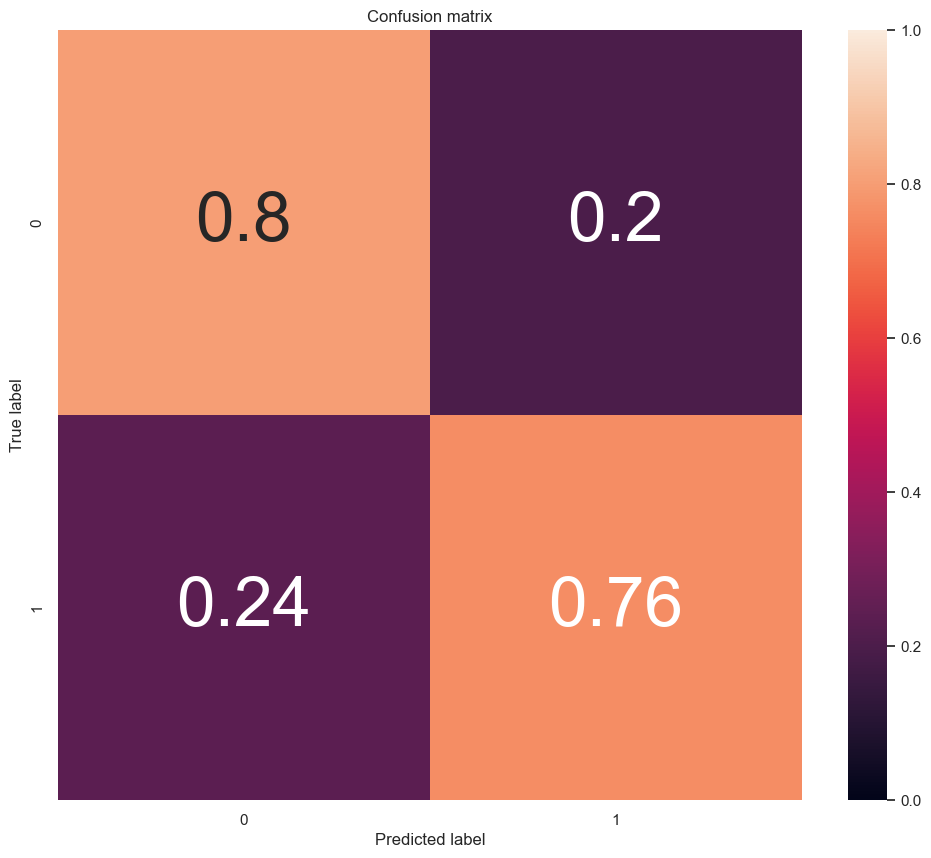

The Classification accuracy (CA) of C parameter 100000.0 is 0.785:
The Log Loss of C parameter 100000.0 is 0.48353787259959335:



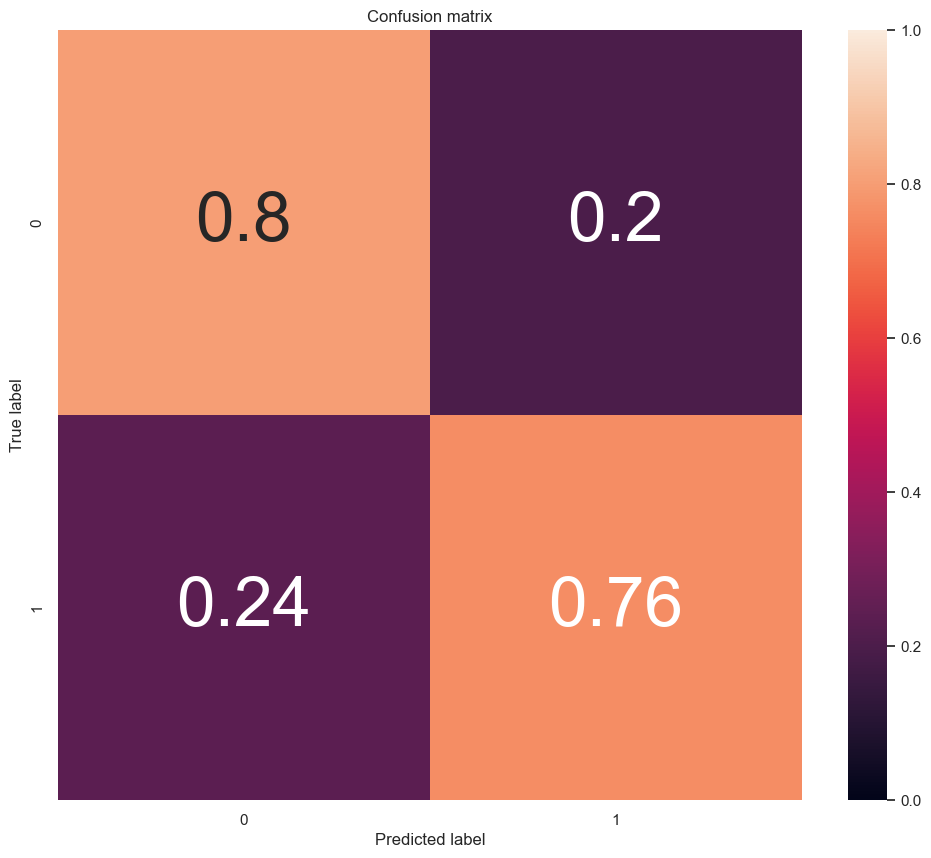

In [68]:
# Before we continue, 
# say we want to track the confusion matrix per 'C' parameter obtained above:



C_list = np.geomspace(1e-5, 1e5, num=20)

# Classification accuracy
CA =[]
Logarithmic_loss = []

for c in C_list:
    log_reg2 = LogisticRegression(random_state=10, solver= 'lbfgs', C=c)  # C: The Inverse of regularization strength. It must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
    log_reg2.fit(X_train_scaled, y_train)
    score = log_reg2.score(X_test_scaled, y_test)
    CA.append(score)
    print("The Classification accuracy (CA) of C parameter {} is {}:".format(c, score))
    pred_proba_test = log_reg2.predict_proba(X_test_scaled)
    log_loss2 = log_loss(y_test, pred_proba_test)
    Logarithmic_loss.append(log_loss2)
    print("The Log Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

    y_pred2 = log_reg2.predict(X_train_scaled)
    cm2 = confusion_matrix(y_train, y_pred)
    cm2_norm =  cm2/cm2.sum(axis=1).reshape(-1,1)
    plot_confusion_matrix(cm2_norm, classes= log_reg.classes_, title= 'Confusion matrix')
    plt.show()

# I notice no changes in the confusion matrix here. There are changes in the tutorial. Perhaps it is due to my use of scaled data

In [69]:
# Moving on:

# Train a dummy classifier to compare with our model to see if it under or over performs

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy= "most_frequent")   # strategy : {"most_frequent", "prior", "stratified", "uniform", "constant"}, default="prior"
                                                         ##### |- it is the strategy to use to generate predictions.
                                                         # "most_frequent": the predict method always returns the most frequent class label in the observed y argument passed to fit. 
                                                         #####|-The predict_proba method returns the matching one-hot encoded vector.
                                                         # "prior": the predict method always returns the most frequent class label in the observed y argument passed to fit (like "most_frequent"). \
                                                         #####|-predict_proba always returns the empirical class distribution of y also known as the empirical class prior distribution.
                                                         # "stratified": the predict_proba method randomly samples one-hot vectors from a multinomial distribution parametrized by the empirical class prior probabilities. 
                                                         ######|-The predict method returns the class label which got probability one in the one-hot vector of predict_proba. Each sampled row of both methods is therefore independent and identically distributed.
                                                         # "uniform": generates predictions uniformly at random from the list of unique classes observed in y, i.e. each class has equal probability.
                                                         # "constant": always predicts a constant label that is provided by the user. This is useful for metrics that evaluate a non-majority class.

dummy_clf.fit(X_train_scaled, y_train)
score = dummy_clf.score(X_test_scaled, y_test)
pred_proba_test4 = dummy_clf.predict_proba(X_test_scaled)
log_loss4 = log_loss(y_test, pred_proba_test)
print("Testing Accuracy: {}".format(score))
print("Log Loss: {}".format(log_loss4))


#Output: ** Recall that in our manual C parameter eval we had the following results:
#  C_List	    CA2	       Logarithmic_loss2
# 0.048329	   0.785	       0.479143

# The output here shows CA is 53%, so our manual calc (our model) is better
# The output here shows log loss is 0.48, and our model has 0.479, so lower log loss => Better

#So we can confirm that our model is good enough to peform in future unseen data

Testing Accuracy: 0.53
Log Loss: 0.48353787259959335


In [ ]:
# Final model

log_reg_final = LogisticRegression(random_state=10, solver= 'lbfgs', C= 0.048329)
log_reg_final.fit(X_train_scaled, y_train)
score_final = log_reg_final.score(X_valid_scaled, y_valid)

pred_proba_test_final = log_reg_final.predict_proba(X_valid_scaled)
log_loss_final = log_loss(y_valid,pred_proba_test_final)

print("Accuracy: {}".format(score_final))
print("Logarithmic Loss: {}".format(log_loss_final))


#accuracy and logloss (.7625, and .433, respectively) are better values in tutorial. But this isnt far off.

# I tried a version with the k-fold output, setting C = 6.158482, and got (Accuracy: 0.75 and Logarithmic Loss: 0.4372932417378867) => better C value I believe

# Our output means we have done a good job at avoiding overfitting (generalisation)

Accuracy: 0.75
Logarithmic Loss: 0.44171163887732073


# How to use our Logistic Regression model


#### 


- Option 1: Deploy the model in a CRM System or the Cloud or Viz tools and automaticaly decide if a customer should get his loan approved or not


- Option 2: Analyse the factors that affect a good/bad loan and help the business understand this. Then the business can educate their clients what they need to improve in order to get a loan


- Option 3: Deploy this model in an open bank website where customers can automatically see if their loan will get approved or not; saving time & cost for the bank/business